In [1]:
#Import Libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sgt import SGT
from collections import defaultdict

import os 
pd.set_option('display.max_rows', 20)



# Training Experience: 10-11 months: Subjects 1,3,5,6

## Top Con - No Bias Boxes

### Healthy

In [53]:
#Read Corpus
path13 = '../../TOP_CON/Healthy/Healthy(1,3)/'
path5 = '../../TOP_CON/Healthy/Healthy(5)/'
path6 = '../../TOP_CON/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

dict_images_healthy = defaultdict(list)
def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                #print(new_path[-33:-29])
                df = pd.read_csv(new_path)
                df['fixation_id_new'] = df['fixation_id'] - df.iloc[0,2] + 1
                dict_images_healthy[str(new_path[-33:-29])].append(df)
                
                
                #yield pd.read_csv(new_path)
load_files(paths)

for i in dict_images_healthy.keys(): 
    dict_images_healthy[i] = pd.concat(dict_images_healthy[i])
dict_images_healthy['9223']



,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,fixation_id_new
0,348708.250750,5262,324,348708.236075,80.6900,1.469479,0.297020,0.348465,0.297020,0.348465,True,1
1,348708.284261,5263,324,348708.236075,80.6900,1.469479,0.295145,0.348908,0.295145,0.348908,True,1
2,348708.518834,5268,325,348708.510423,96.8280,1.231624,0.404349,0.354698,0.404349,0.354698,True,2
3,348708.552344,5269,325,348708.510423,96.8280,1.231624,0.399859,0.354932,0.399859,0.354932,True,2
4,348708.619365,5270,325,348708.510423,96.8280,1.231624,0.390286,0.351950,0.390286,0.351950,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...
80,327838.325989,6149,1914,327838.228040,177.6370,1.166081,0.214112,0.735739,0.214112,0.735739,True,33
81,327838.415879,6150,1914,327838.228040,177.6370,1.166081,0.215588,0.734505,0.215588,0.734505,True,33
82,327838.496197,6151,1915,327838.480316,166.9505,1.434187,0.880323,0.478491,0.880323,0.478491,True,34
83,327838.578148,6152,1915,327838.480316,166.9505,1.434187,0.883698,0.471010,0.883698,0.471010,True,34


In [5]:
def equal_boxes(x,y):
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.25 > i and 0<j and 0.25 > j: 
            arr.append('A')
        elif 0.25<i and 0.5 > i and 0<j and 0.25 > j: 
            arr.append('B')
        elif 0.5<i and 0.75 > i and 0<j and 0.25 > j: 
            arr.append('C')
        elif 0.75<i and 1 > i and 0<j and 0.25 > j: 
            arr.append('D')
        elif 0<i and 0.25 > i and 0.25<j and 0.5 > j: 
            arr.append('E')
        elif 0.25<i and 0.5 > i and 0.25<j and 0.5 > j: 
            arr.append('F')
        elif 0.5<i and 0.75 > i and 0.25<j and 0.5 > j: 
            arr.append('G')
        elif 0.75<i and 1 > i and 0.25<j and 0.5 > j: 
            arr.append('H')
        elif 0<i and 0.25 > i and 0.5<j and 0.75 > j: 
            arr.append('I')
        elif 0.25<i and 0.5 > i and 0.5<j and 0.75 > j: 
            arr.append('J')
        elif 0.5<i and 0.75 > i and 0.5<j and 0.75 > j: 
            arr.append('K')
        elif 0.75<i and 1 > i and 0.5<j and 0.75 > j: 
            arr.append('L')
        elif 0<i and 0.25 > i and 0.75<j and 1 > j: 
            arr.append('M')
        elif 0.25<i and 0.5 > i and 0.75<j and 1 > j: 
            arr.append('N')
        elif 0.5<i and 0.75 > i and 0.75<j and 1 > j: 
            arr.append('O')
        elif 0.75<i and 1 > i and 0.75<j and 1 > j: 
            arr.append('P')
        else: 
            arr.append('error')
    return arr

# dict_images_arr = defaultdict()
# for i in dict_images_healthy.keys(): 
#     x = dict_images_healthy[i].norm_pos_x
#     y = dict_images_healthy[i].norm_pos_y
#     dict_images_arr[i] = equal_boxes(x,y)

In [6]:
def make_corpus(corpus_new):
    A = np.array(corpus_new.fixation_id_new[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id_new[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id_new[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id_new[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id_new[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id_new[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id_new[corpus_new.letters=='G'])
    H = np.array(corpus_new.fixation_id_new[corpus_new.letters=='H'])
    I = np.array(corpus_new.fixation_id_new[corpus_new.letters=='I'])
    J = np.array(corpus_new.fixation_id_new[corpus_new.letters=='J'])
    K = np.array(corpus_new.fixation_id_new[corpus_new.letters=='K'])
    L = np.array(corpus_new.fixation_id_new[corpus_new.letters=='L'])
    M = np.array(corpus_new.fixation_id_new[corpus_new.letters=='M'])
    N = np.array(corpus_new.fixation_id_new[corpus_new.letters=='N'])
    O = np.array(corpus_new.fixation_id_new[corpus_new.letters=='O'])
    P = np.array(corpus_new.fixation_id_new[corpus_new.letters=='P'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G], 
                           [8, H], 
                           [9, I], 
                           [10, J],
                           [11, K], 
                           [12, L], 
                           [13, M], 
                           [14, N],
                           [15, O], 
                           [16, P]], 
                          columns=['id', 'sequence'])
    return corpus

# for i in dict_images_arr.keys(): 
#     dict_images_healthy[i]['letters'] = dict_images_arr[i]
#     dict_images_healthy[i] = dict_images_healthy[i][['letters', 'fixation_id_new']]
#     dict_images_healthy[i]= make_corpus(dict_images_healthy[i])
    
# dict_images_healthy['9223']

In [57]:
embeddings_dict = defaultdict()
for i in dict_images_healthy.keys(): 
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(dict_images_healthy[i])
    embeddings_dict[i] = sgtembedding_df.set_index('id')
display(embeddings_dict['9223'].columns)

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Index([  (1, 1),   (1, 2),   (1, 3),   (1, 4),   (1, 5),   (1, 6),   (1, 7),
         (1, 8),   (1, 9),  (1, 10),
       ...
       (34, 25), (34, 26), (34, 27), (34, 28), (34, 29), (34, 30), (34, 31),
       (34, 32), (34, 33), (34, 34)],
      dtype='object', length=1156)

In [60]:
pca_dict = defaultdict()
for i in embeddings_dict.keys(): 
    pca = PCA(n_components=2)
    pca.fit(embeddings_dict[i])
    X=pca.transform(embeddings_dict[i])
    pca_dict[i] = pd.DataFrame(data=X, columns=['x1', 'x2'])


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

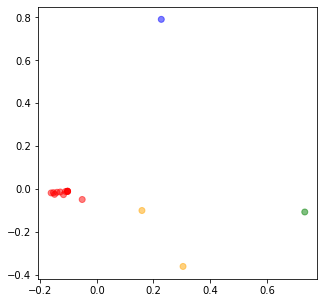

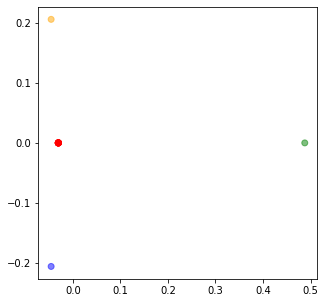

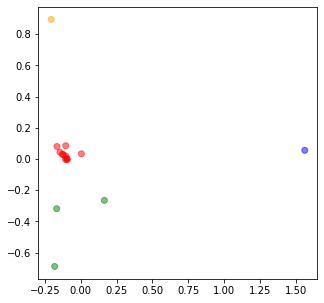

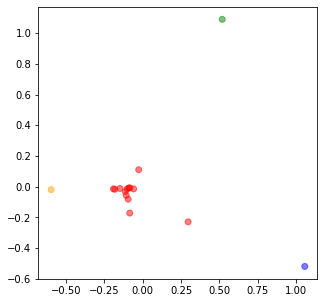

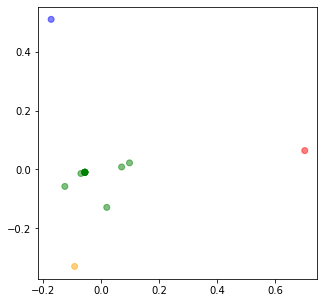

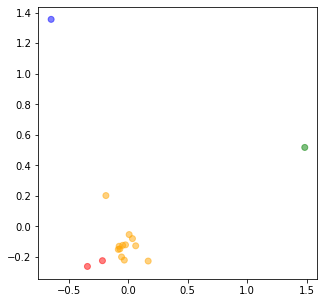

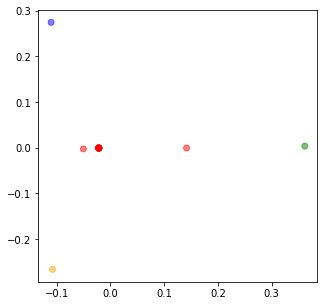

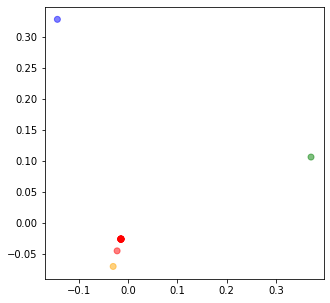

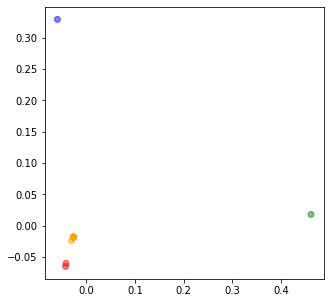

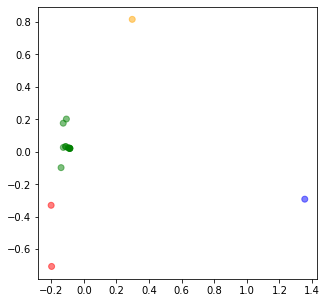

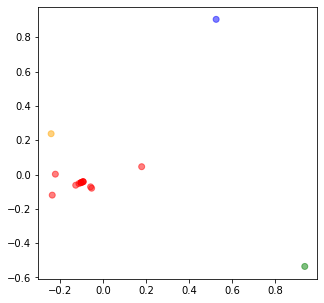

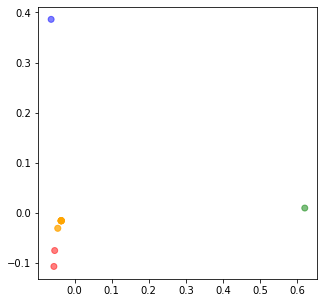

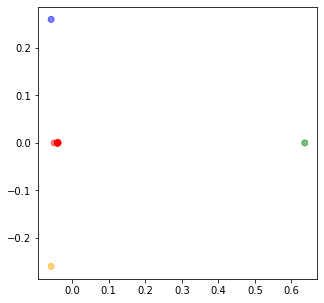

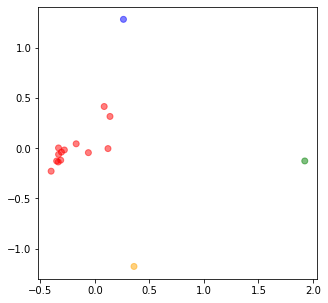

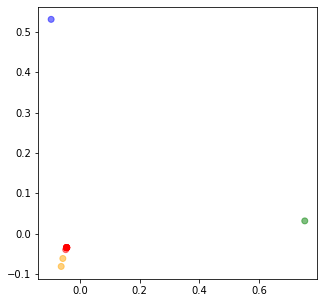

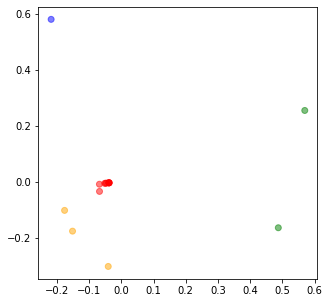

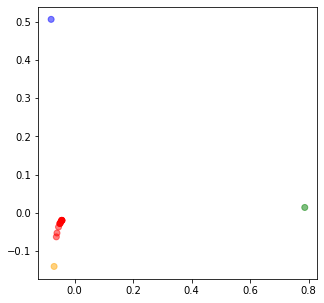

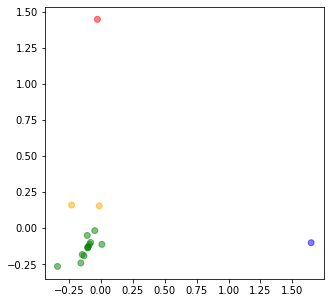

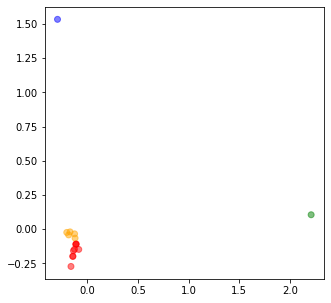

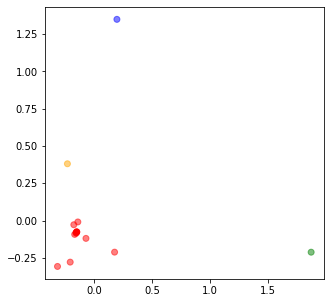

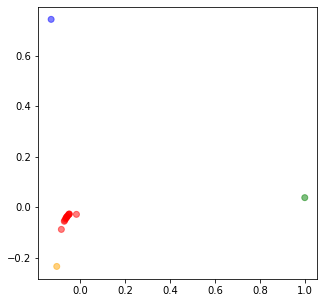

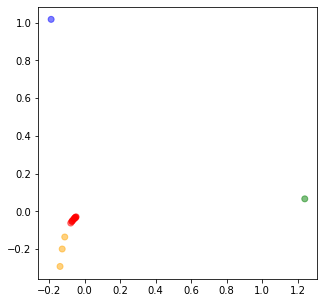

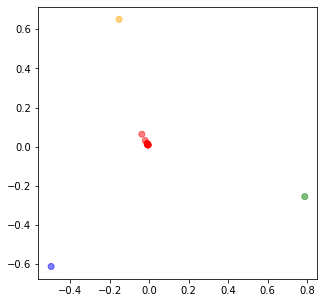

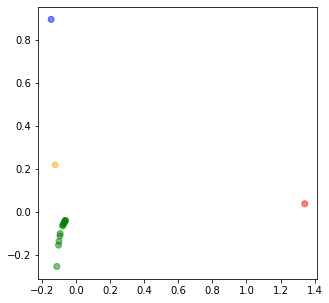

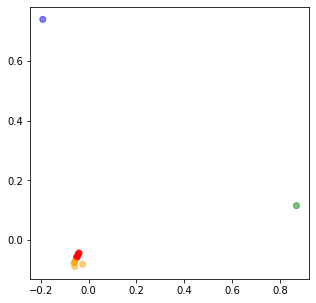

In [62]:
for i in pca_dict.keys():
    
    kmeans = KMeans(n_clusters=4, max_iter =300)
    kmeans.fit(pca_dict[i])

    labels = kmeans.predict(pca_dict[i])
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(5, 5))
    colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
    colors = list(map(lambda x: colmap[x+1], labels))
    plt.scatter(pca_dict[i]['x1'], pca_dict[i]['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [8]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.286897,-0.283612,orange
1,-0.922277,3.463619,green
2,-0.284229,-0.378112,orange
3,-0.223466,-0.597191,orange
4,-0.263949,-0.236209,orange
5,-0.179073,2.469870,green
6,-0.373230,-0.269628,orange
7,-0.463734,-1.472735,red
8,-0.247156,-0.311689,orange
9,-0.398051,-0.640694,orange


### Glaucoma

In [9]:
#Read Corpus
path13 = '../../TOP_CON/Glaucoma/Glaucoma(1,3)/'
path5 = '../../TOP_CON/Glaucoma/Glaucoma(5)/'
path6 = '../../TOP_CON/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]


def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)


corpus_diseased = pd.concat(load_files(paths))



In [10]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)

In [11]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [12]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


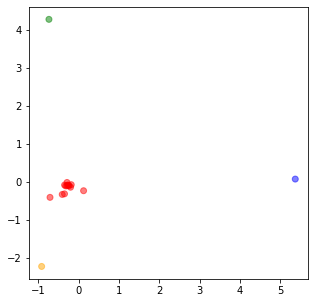

In [13]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [14]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.319996,-0.109014,red
1,-0.735891,4.284507,green
2,-0.708963,-0.411465,red
3,-0.917002,-2.233945,orange
4,-0.287507,-0.019032,red
5,-0.348075,-0.085632,red
6,-0.405771,-0.334177,red
7,-0.349681,-0.318574,red
8,-0.287564,-0.104317,red
9,-0.199957,-0.144182,red


## Top Con -  Bias Boxes

### Healthy

In [2]:
#Read Corpus
path4 = '../../TOP_CON/Healthy/Healthy(4)/'
path7 = '../../TOP_CON/Healthy/Healthy(7)/'
path9 = '../../TOP_CON/Healthy/Healthy(9)/'
path12 = '../../TOP_CON/Healthy/Healthy(12)/'
#path14 = '../../TOP_CON/Healthy/Healthy(14)/'

paths = [path4, path7, path9, path12]

dict_images_healthy = defaultdict(list)
def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                #print(new_path[-33:-29])
                df = pd.read_csv(new_path)
                print(new_path)
                display(df)
                df['fixation_id_new'] = df['fixation_id'] - df.iloc[0,2] + 1
                dict_images_healthy[str(new_path[-33:-29])].append(df)
                
                
                #yield pd.read_csv(new_path)
load_files(paths)

for i in dict_images_healthy.keys(): 
    dict_images_healthy[i] = pd.concat(dict_images_healthy[i])
# dict_images_healthy['9223']



../../TOP_CON/Healthy/Healthy(4)/fixations_Healthy_9223_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,197158.848574,18290,2912,197158.812723,80.6895,1.342626,0.442910,0.569795,0.442910,0.569795,True
1,197158.915595,18292,2913,197158.917619,88.7590,1.461557,0.099913,0.562134,0.099913,0.562134,True
2,197158.982615,18294,2913,197158.917619,88.7590,1.461557,0.385198,0.511880,0.385198,0.511880,True
3,197159.016125,18295,2913,197158.917619,88.7590,1.461557,0.366899,0.478768,0.366899,0.478768,True
4,197159.016125,18295,2914,197159.022517,84.7240,1.425477,0.423244,0.485469,0.423244,0.485469,True
...,...,...,...,...,...,...,...,...,...,...,...
273,197171.984550,18682,2978,197171.837115,217.8630,0.916022,0.671858,0.676975,0.671858,0.676975,True
274,197172.018061,18683,2978,197171.837115,217.8630,0.916022,0.674014,0.671718,0.674014,0.671718,True
275,197172.051571,18684,2978,197171.837115,217.8630,0.916022,0.286611,0.356114,0.286611,0.356114,True
276,197172.051571,18684,2979,197172.063047,217.8620,1.306905,0.259346,0.349996,0.259346,0.349996,True


../../TOP_CON/Healthy/Healthy(4)/fixations_Healthy_9103_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,197130.599524,17447,2781,197130.559688,108.9315,1.454973,0.799853,0.236981,0.799853,0.236981,True
1,197130.633034,17448,2781,197130.559688,108.9315,1.454973,0.669803,0.333848,0.669803,0.333848,True
2,197130.666544,17449,2781,197130.559688,108.9315,1.454973,0.438316,0.476994,0.438316,0.476994,True
3,197130.666544,17449,2782,197130.672653,133.1385,1.341106,0.433291,0.460955,0.433291,0.460955,True
4,197130.800585,17453,2782,197130.672653,133.1385,1.341106,0.447250,0.512537,0.447250,0.512537,True
...,...,...,...,...,...,...,...,...,...,...,...
315,197145.679088,17897,2853,197145.516096,217.8630,1.188864,0.703541,0.658046,0.703541,0.658046,True
316,197145.712598,17898,2853,197145.516096,217.8630,1.188864,0.698643,0.643882,0.698643,0.643882,True
317,197145.746108,17899,2853,197145.516096,217.8630,1.188864,0.624341,0.700555,0.624341,0.700555,True
318,197145.746108,17899,2854,197145.742028,217.8620,1.497079,0.627458,0.687612,0.627458,0.687612,True


../../TOP_CON/Healthy/Healthy(4)/fixations_Healthy_9222_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,197108.683890,16793,2679,197108.688694,169.4485,1.418658,0.289915,0.493890,0.289915,0.493890,True
1,197108.784421,16796,2679,197108.688694,169.4485,1.418658,0.262513,0.526538,0.262513,0.526538,True
2,197108.817931,16797,2679,197108.688694,169.4485,1.418658,0.183190,0.651562,0.183190,0.651562,True
3,197108.918461,16800,2680,197108.906556,96.8280,1.448572,0.262210,0.227768,0.262210,0.227768,True
4,197108.985481,16802,2680,197108.906556,96.8280,1.448572,0.190397,0.443690,0.190397,0.443690,True
...,...,...,...,...,...,...,...,...,...,...,...
167,197117.463548,17055,2725,197117.395133,217.8625,0.691752,0.539206,0.350185,0.539206,0.350185,True
168,197117.497058,17056,2725,197117.395133,217.8625,0.691752,0.469128,0.401248,0.469128,0.401248,True
169,197117.530568,17057,2725,197117.395133,217.8625,0.691752,0.512227,0.366859,0.512227,0.366859,True
170,197117.664608,17061,2726,197117.617029,125.0690,0.677384,0.467451,0.362854,0.467451,0.362854,True


../../TOP_CON/Healthy/Healthy(4)/fixations_Healthy_8909_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,197066.729191,15541,2465,197066.648936,137.1725,1.430327,0.492627,0.295758,0.492627,0.295758,True
1,197067.030782,15550,2467,197067.020109,100.8620,1.380246,0.448680,0.429794,0.448680,0.429794,True
2,197067.097803,15552,2467,197067.020109,100.8620,1.380246,0.612606,0.201266,0.612606,0.201266,True
3,197067.131313,15553,2467,197067.020109,100.8620,1.380246,0.294526,0.599903,0.294526,0.599903,True
4,197067.131313,15553,2468,197067.125006,137.1730,1.171013,0.322362,0.563712,0.322362,0.563712,True
...,...,...,...,...,...,...,...,...,...,...,...
115,197072.995588,15728,2497,197072.806782,177.5180,1.377380,0.659748,0.599589,0.659748,0.599589,True
116,197072.995588,15728,2498,197073.000438,145.2420,1.297504,0.710646,0.613713,0.710646,0.613713,True
117,197073.096118,15731,2498,197073.000438,145.2420,1.297504,0.528830,0.371715,0.528830,0.371715,True
118,197073.129628,15732,2498,197073.000438,145.2420,1.297504,0.689267,0.577877,0.689267,0.577877,True


../../TOP_CON/Healthy/Healthy(4)/fixations_Healthy_8904_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,196748.014296,6052,924,196747.779939,217.8630,0.676013,0.597489,0.355937,0.597489,0.355937,True
1,196748.014296,6052,925,196748.005871,161.3790,0.725717,0.583234,0.332231,0.583234,0.332231,True
2,196748.081317,6054,925,196748.005871,161.3790,0.725717,0.577236,0.349218,0.577236,0.349218,True
3,196748.114827,6055,925,196748.005871,161.3790,0.725717,0.455169,0.455470,0.455169,0.455470,True
4,196748.349398,6062,926,196748.275006,80.6900,1.472057,0.368057,0.469614,0.368057,0.469614,True
...,...,...,...,...,...,...,...,...,...,...,...
514,196772.912338,6795,1054,196772.808753,169.4485,1.101261,0.158842,0.253783,0.158842,0.253783,True
515,196773.414990,6810,1057,196773.357444,145.2415,1.373291,0.285553,0.190175,0.285553,0.190175,True
516,196773.448500,6811,1057,196773.357444,145.2415,1.373291,0.216258,0.192652,0.216258,0.192652,True
517,196773.616051,6816,1058,196773.575307,197.6900,1.468099,0.317414,0.285286,0.317414,0.285286,True


../../TOP_CON/Healthy/Healthy(4)/fixations_Healthy_9193_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,197319.965342,23095,3627,197319.898062,153.3105,1.424348,0.382080,0.788305,0.382080,0.788305,True
1,197320.032363,23097,3627,197319.898062,153.3105,1.424348,0.352120,0.804857,0.352120,0.804857,True
2,197320.065873,23098,3627,197319.898062,153.3105,1.424348,0.337390,0.805730,0.337390,0.805730,True
3,197320.266934,23104,3628,197320.273270,177.5180,1.462514,0.176496,0.914015,0.176496,0.914015,True
4,197320.367464,23107,3628,197320.273270,177.5180,1.462514,0.064185,0.303127,0.064185,0.303127,True
...,...,...,...,...,...,...,...,...,...,...,...
72,197323.953049,23214,3646,197323.835726,145.2420,1.312940,0.327311,0.802021,0.327311,0.802021,True
73,197324.321661,23225,3647,197324.303727,100.8625,1.492751,0.374253,0.316635,0.374253,0.316635,True
74,197324.522722,23231,3648,197324.525625,80.6900,1.405995,0.349524,0.650277,0.349524,0.650277,True
75,197324.556232,23232,3648,197324.525625,80.6900,1.405995,0.349783,0.642003,0.349783,0.642003,True


../../TOP_CON/Healthy/Healthy(4)/fixations_Healthy_9219_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,197093.269224,16333,2602,197093.280960,104.8960,1.427740,0.496154,0.495118,0.496154,0.495118,True
1,197093.302734,16334,2602,197093.280960,104.8960,1.427740,0.377364,0.609749,0.377364,0.609749,True
2,197093.336245,16335,2602,197093.280960,104.8960,1.427740,0.602466,0.406373,0.602466,0.406373,True
3,197093.369755,16336,2602,197093.280960,104.8960,1.427740,0.415580,0.594735,0.415580,0.594735,True
4,197093.436775,16338,2603,197093.389890,125.0695,0.934404,0.707144,0.277288,0.707144,0.277288,True
...,...,...,...,...,...,...,...,...,...,...,...
97,197097.994154,16474,2629,197097.783455,217.8630,0.760457,0.401322,0.285094,0.401322,0.285094,True
98,197098.898928,16501,2633,197098.836459,80.6895,1.360200,0.318384,0.454331,0.318384,0.454331,True
99,197098.932438,16502,2633,197098.836459,80.6895,1.360200,0.323141,0.421418,0.323141,0.421418,True
100,197098.932438,16502,2634,197098.921182,217.8625,0.790174,0.294399,0.425821,0.294399,0.425821,True


../../TOP_CON/Healthy/Healthy(4)/fixations_Healthy_9084_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,197293.257758,22298,3493,197293.179843,108.9315,1.484686,0.290268,0.664029,0.290268,0.664029,True
1,197293.324778,22300,3494,197293.292809,96.8280,1.352907,0.422912,0.445075,0.422912,0.445075,True
2,197293.391799,22302,3494,197293.292809,96.8280,1.352907,0.242184,0.660981,0.242184,0.660981,True
3,197293.391799,22302,3495,197293.393672,80.6905,1.062167,0.274996,0.668851,0.274996,0.668851,True
4,197293.458819,22304,3495,197293.393672,80.6905,1.062167,0.266440,0.649664,0.266440,0.649664,True
...,...,...,...,...,...,...,...,...,...,...,...
179,197302.573578,22576,3544,197302.535854,80.6900,1.428129,0.504061,0.458623,0.504061,0.458623,True
180,197302.607088,22577,3544,197302.535854,80.6900,1.428129,0.057605,0.373634,0.057605,0.373634,True
181,197302.607088,22577,3545,197302.620579,217.8625,1.104649,0.054179,0.410787,0.054179,0.410787,True
182,197302.640598,22578,3545,197302.620579,217.8625,1.104649,0.447535,0.510654,0.447535,0.510654,True


../../TOP_CON/Healthy/Healthy(4)/fixations_Healthy_9261_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,197015.860794,14023,2216,197015.696702,217.8630,1.362665,0.388158,0.601659,0.388158,0.601659,True
1,197015.994834,14027,2217,197016.003323,80.6895,1.418356,0.581575,0.531850,0.581575,0.531850,True
2,197016.095365,14030,2217,197016.003323,80.6895,1.418356,0.460849,0.626723,0.460849,0.626723,True
3,197016.095365,14030,2218,197016.104186,84.7245,1.405026,0.493849,0.576550,0.493849,0.576550,True
4,197016.128875,14031,2218,197016.104186,84.7245,1.405026,0.916253,0.292725,0.916253,0.292725,True
...,...,...,...,...,...,...,...,...,...,...,...
555,197047.494369,14967,2371,197047.372131,112.9660,1.463290,0.314712,0.509611,0.314712,0.509611,True
556,197047.594899,14970,2372,197047.602096,217.8625,1.419719,0.231367,0.652681,0.231367,0.652681,True
557,197047.628409,14971,2372,197047.602096,217.8625,1.419719,0.235624,0.659486,0.235624,0.659486,True
558,197047.661920,14972,2372,197047.602096,217.8625,1.419719,0.228240,0.653186,0.228240,0.653186,True


../../TOP_CON/Healthy/Healthy(4)/fixations_Healthy_9105_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,196967.773738,12588,1978,196967.738737,80.6900,1.387295,0.419535,0.448322,0.419535,0.448322,True
1,196968.075330,12597,1979,196968.025186,133.1385,1.473236,0.260349,0.551985,0.260349,0.551985,True
2,196968.108840,12598,1979,196968.025186,133.1385,1.473236,0.316924,0.465264,0.316924,0.465264,True
3,196968.142350,12599,1979,196968.025186,133.1385,1.473236,0.302498,0.483096,0.302498,0.483096,True
4,196968.242880,12602,1980,196968.218840,217.8630,1.495143,0.298091,0.548812,0.298091,0.548812,True
...,...,...,...,...,...,...,...,...,...,...,...
673,197003.193960,13645,2156,197003.068753,217.8625,1.494083,0.381612,0.257409,0.381612,0.257409,True
674,197003.227470,13646,2156,197003.068753,217.8625,1.494083,0.419461,0.240741,0.419461,0.240741,True
675,197003.260980,13647,2156,197003.068753,217.8625,1.494083,0.494378,0.207279,0.494378,0.207279,True
676,197003.294490,13648,2156,197003.068753,217.8625,1.494083,0.495103,0.204330,0.495103,0.204330,True


../../TOP_CON/Healthy/Healthy(7)/fixations_Healthy_9189_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,88793.843966,3932,532,88793.795303,81.4485,1.284702,0.511288,0.524926,0.511288,0.524926,True
1,88794.018341,3937,533,88793.987810,96.2460,1.499423,0.284692,0.248205,0.284692,0.248205,True
2,88794.236907,3943,534,88794.244186,80.8500,1.391576,0.284061,0.186297,0.284061,0.186297,True
3,88794.276608,3944,534,88794.244186,80.8500,1.391576,0.272630,0.186974,0.272630,0.186974,True
4,88794.316447,3945,534,88794.244186,80.8500,1.391576,0.251940,0.171623,0.251940,0.171623,True
...,...,...,...,...,...,...,...,...,...,...,...
110,88799.452020,4082,560,88799.384577,137.3005,1.180569,0.231217,0.616338,0.231217,0.616338,True
111,88799.485378,4083,560,88799.384577,137.3005,1.180569,0.333160,0.899031,0.333160,0.899031,True
112,88799.524525,4084,560,88799.384577,137.3005,1.180569,0.245348,0.650403,0.245348,0.650403,True
113,88799.793745,4091,561,88799.795795,95.8025,1.497831,0.287234,0.487270,0.287234,0.487270,True


../../TOP_CON/Healthy/Healthy(7)/fixations_Healthy_9222_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,88727.488130,2154,288,88727.356437,193.6430,1.378563,0.411430,0.599863,0.411430,0.599863,True
1,88727.563378,2156,288,88727.356437,193.6430,1.378563,0.382726,0.615916,0.382726,0.615916,True
2,88728.208323,2173,289,88728.211784,171.8835,1.382444,0.709093,0.670960,0.709093,0.670960,True
3,88728.248380,2174,289,88728.211784,171.8835,1.382444,0.710387,0.673130,0.710387,0.673130,True
4,88728.284231,2175,289,88728.211784,171.8835,1.382444,0.713268,0.676055,0.713268,0.676055,True
...,...,...,...,...,...,...,...,...,...,...,...
17,88728.945050,2191,292,88728.808259,151.2130,1.433180,0.517380,0.310420,0.517380,0.310420,True
18,88729.164742,2197,293,88729.180968,95.1470,0.886616,0.762616,0.688011,0.762616,0.688011,True
19,88729.200763,2198,293,88729.180968,95.1470,0.886616,0.742786,0.681826,0.742786,0.681826,True
20,88729.239831,2199,293,88729.180968,95.1470,0.886616,0.742822,0.678748,0.742822,0.678748,True


../../TOP_CON/Healthy/Healthy(7)/fixations_Healthy_8904_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,88677.087055,827,100,88677.042448,81.8235,1.463744,0.657039,0.435252,0.657039,0.435252,True
1,88677.122365,828,100,88677.042448,81.8235,1.463744,0.452663,0.683542,0.452663,0.683542,True
2,88677.122365,828,101,88677.130587,107.6770,1.415676,0.451148,0.670635,0.451148,0.670635,True
3,88677.158342,829,101,88677.130587,107.6770,1.415676,0.449546,0.673464,0.449546,0.673464,True
4,88677.193651,830,101,88677.130587,107.6770,1.415676,0.448691,0.674468,0.448691,0.674468,True
...,...,...,...,...,...,...,...,...,...,...,...
182,88686.963632,1080,142,88686.922358,187.2055,1.374912,0.617681,0.178744,0.617681,0.178744,True
183,88687.001135,1081,142,88686.922358,187.2055,1.374912,0.617730,0.179034,0.617730,0.179034,True
184,88687.039584,1082,142,88686.922358,187.2055,1.374912,0.618847,0.178609,0.618847,0.178609,True
185,88687.079688,1083,142,88686.922358,187.2055,1.374912,0.619075,0.178271,0.619075,0.178271,True


../../TOP_CON/Healthy/Healthy(7)/fixations_Healthy_9257_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,88806.594849,4278,583,88806.582813,81.9125,1.357354,0.833589,0.611485,0.833589,0.611485,True
1,88806.633714,4279,583,88806.582813,81.9125,1.357354,0.865540,0.626208,0.865540,0.626208,True
2,88806.674367,4280,583,88806.582813,81.9125,1.357354,0.822118,0.621339,0.822118,0.621339,True
3,88806.674367,4280,584,88806.668346,112.3820,1.291684,0.834355,0.614973,0.834355,0.614973,True
4,88806.714613,4281,584,88806.668346,112.3820,1.291684,0.839530,0.610925,0.839530,0.610925,True
...,...,...,...,...,...,...,...,...,...,...,...
116,88814.673622,4495,612,88814.561984,98.1905,1.434475,0.509386,0.302228,0.509386,0.302228,True
117,88814.673622,4495,613,88814.666022,108.4545,1.054683,0.532586,0.305871,0.532586,0.305871,True
118,88814.700306,4496,613,88814.666022,108.4545,1.054683,0.534080,0.305084,0.534080,0.305084,True
119,88814.743727,4497,613,88814.666022,108.4545,1.054683,0.532483,0.304850,0.532483,0.304850,True


../../TOP_CON/Healthy/Healthy(7)/fixations_Healthy_9193_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,88786.669664,3738,499,88786.648621,96.6780,1.362989,0.264159,0.207614,0.264159,0.207614,True
1,88786.715775,3739,499,88786.648621,96.6780,1.362989,0.282952,0.217671,0.282952,0.217671,True
2,88786.756996,3740,499,88786.648621,96.6780,1.362989,0.304930,0.235425,0.304930,0.235425,True
3,88786.756996,3740,500,88786.752476,98.3420,1.271071,0.298004,0.182184,0.298004,0.182184,True
4,88786.799196,3741,500,88786.752476,98.3420,1.271071,0.273367,0.165510,0.273367,0.165510,True
...,...,...,...,...,...,...,...,...,...,...,...
37,88788.463226,3784,508,88788.418966,89.6515,1.138767,0.682156,0.191873,0.682156,0.191873,True
38,88788.501501,3785,508,88788.418966,89.6515,1.138767,0.700139,0.186362,0.700139,0.186362,True
39,88788.501501,3785,509,88788.514112,109.1840,1.374741,0.718860,0.195953,0.718860,0.195953,True
40,88788.540200,3786,509,88788.514112,109.1840,1.374741,0.690357,0.197073,0.690357,0.197073,True


../../TOP_CON/Healthy/Healthy(7)/fixations_Healthy_9219_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,88848.407968,5402,752,88848.407804,116.0425,1.405930,0.198502,0.131472,0.198502,0.131472,True
1,88848.441270,5403,752,88848.407804,116.0425,1.405930,0.231834,0.148396,0.231834,0.148396,True
2,88848.664298,5409,753,88848.658700,109.5505,1.399137,0.255879,0.146924,0.255879,0.146924,True
3,88848.697726,5410,753,88848.658700,109.5505,1.399137,0.239529,0.145807,0.239529,0.145807,True
4,88848.742087,5411,753,88848.658700,109.5505,1.399137,0.248789,0.147442,0.248789,0.147442,True
...,...,...,...,...,...,...,...,...,...,...,...
23,88850.669980,5461,759,88850.590539,89.6740,1.429886,0.006054,0.514425,0.006054,0.514425,True
24,88850.669980,5461,760,88850.683950,105.3070,1.432935,0.016574,0.511844,0.016574,0.511844,True
25,88850.705734,5462,760,88850.683950,105.3070,1.432935,0.010129,0.500390,0.010129,0.500390,True
26,88850.742415,5463,760,88850.683950,105.3070,1.432935,0.007264,0.471278,0.007264,0.471278,True


../../TOP_CON/Healthy/Healthy(7)/fixations_Healthy_9226_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,88768.316941,3240,427,88768.296128,83.9320,1.488073,0.144297,0.152095,0.144297,0.152095,True
1,88768.354506,3241,427,88768.296128,83.9320,1.488073,0.293606,0.068549,0.293606,0.068549,True
2,88768.388665,3242,427,88768.296128,83.9320,1.488073,0.240835,0.226938,0.240835,0.226938,True
3,88768.606012,3248,428,88768.595337,127.5095,1.321310,0.295222,0.289689,0.295222,0.289689,True
4,88768.645530,3249,428,88768.595337,127.5095,1.321310,0.284025,0.280254,0.284025,0.280254,True
...,...,...,...,...,...,...,...,...,...,...,...
34,88770.317747,3294,434,88770.236292,219.3455,1.453558,0.755186,0.730067,0.755186,0.730067,True
35,88770.357765,3295,434,88770.236292,219.3455,1.453558,0.753828,0.726434,0.753828,0.726434,True
36,88770.390530,3296,434,88770.236292,219.3455,1.453558,0.753372,0.727870,0.753372,0.727870,True
37,88770.426238,3297,434,88770.236292,219.3455,1.453558,0.751089,0.723238,0.751089,0.723238,True


../../TOP_CON/Healthy/Healthy(7)/fixations_Healthy_8910_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,88868.734906,5953,834,88868.698836,124.0140,1.492190,0.095206,0.204617,0.095206,0.204617,True
1,88868.768784,5954,834,88868.698836,124.0140,1.492190,0.133534,0.303688,0.133534,0.303688,True
2,88868.835350,5956,834,88868.698836,124.0140,1.492190,0.113708,0.285669,0.113708,0.285669,True
3,88869.470821,5973,835,88869.466139,91.7550,1.415797,0.089903,0.253599,0.089903,0.253599,True
4,88869.509987,5974,835,88869.466139,91.7550,1.415797,0.095177,0.282477,0.095177,0.282477,True
...,...,...,...,...,...,...,...,...,...,...,...
68,88874.166441,6096,852,88874.169764,168.6715,1.157184,0.828708,0.691058,0.828708,0.691058,True
69,88874.202086,6097,852,88874.169764,168.6715,1.157184,0.830324,0.690703,0.830324,0.690703,True
70,88874.240155,6098,852,88874.169764,168.6715,1.157184,0.622091,0.514107,0.622091,0.514107,True
71,88874.276532,6099,852,88874.169764,168.6715,1.157184,0.831500,0.688988,0.831500,0.688988,True


../../TOP_CON/Healthy/Healthy(7)/fixations_Healthy_9105_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,88823.396977,4730,649,88823.383189,90.7745,1.436363,0.385845,0.413442,0.385845,0.413442,True
1,88823.459896,4732,649,88823.383189,90.7745,1.436363,0.434381,0.300456,0.434381,0.300456,True
2,88823.956674,4746,650,88823.931876,94.4125,1.111545,0.277377,0.255012,0.277377,0.255012,True
3,88823.992382,4747,650,88823.931876,94.4125,1.111545,0.302183,0.280249,0.302183,0.280249,True
4,88824.029753,4748,650,88823.931876,94.4125,1.111545,0.275330,0.258645,0.275330,0.258645,True
...,...,...,...,...,...,...,...,...,...,...,...
83,88828.348097,4859,670,88828.293465,88.8155,1.171977,0.296537,0.297053,0.296537,0.297053,True
84,88828.391002,4860,670,88828.293465,88.8155,1.171977,0.297141,0.298440,0.297141,0.298440,True
85,88829.170854,4881,671,88829.156023,107.0825,1.046794,0.871576,0.701133,0.871576,0.701133,True
86,88829.209099,4882,671,88829.156023,107.0825,1.046794,0.905182,0.729732,0.905182,0.729732,True


../../TOP_CON/Healthy/Healthy(7)/fixations_Healthy_9016_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,88759.660826,3005,398,88759.572025,83.2460,1.397004,0.153177,0.157347,0.153177,0.157347,True
1,88760.090710,3016,399,88760.069660,140.7175,1.392287,0.766353,0.655514,0.766353,0.655514,True
2,88760.126987,3017,399,88760.069660,140.7175,1.392287,0.740776,0.645840,0.740776,0.645840,True
3,88760.164492,3018,399,88760.069660,140.7175,1.392287,0.770460,0.660513,0.770460,0.660513,True
4,88760.768869,3034,400,88760.785652,87.3155,1.430675,0.647087,0.262024,0.647087,0.262024,True
...,...,...,...,...,...,...,...,...,...,...,...
34,88762.035457,3067,406,88761.922523,139.4670,1.446945,0.736292,0.309523,0.736292,0.309523,True
35,88762.075402,3068,406,88761.922523,139.4670,1.446945,0.716750,0.325680,0.716750,0.325680,True
36,88762.339053,3075,407,88762.325692,81.2920,1.096421,0.829664,0.342439,0.829664,0.342439,True
37,88762.381171,3076,407,88762.325692,81.2920,1.096421,0.829588,0.341417,0.829588,0.341417,True


../../TOP_CON/Healthy/Healthy(9)/fixations_Healthy_8909_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,755108.138523,453,89,755107.954292,217.8700,1.363000,0.492478,0.782083,0.492478,0.782083,True
1,755108.239055,455,90,755108.176197,157.3505,0.980633,0.635396,0.744599,0.635396,0.744599,True
2,755108.339588,458,90,755108.176197,157.3505,0.980633,0.627243,0.751873,0.627243,0.751873,True
3,755108.473631,462,91,755108.381963,153.3155,1.300732,0.593720,0.690288,0.593720,0.690288,True
4,755108.507142,463,91,755108.381963,153.3155,1.300732,0.584406,0.709348,0.584406,0.709348,True
...,...,...,...,...,...,...,...,...,...,...,...
246,755121.609892,765,154,755121.498508,197.6965,1.415300,0.435333,0.314599,0.435333,0.314599,True
247,755121.643403,766,154,755121.498508,197.6965,1.415300,0.509118,0.195946,0.509118,0.195946,True
248,755121.710425,767,154,755121.498508,197.6965,1.415300,0.499820,0.210053,0.499820,0.210053,True
249,755122.414153,784,158,755122.398228,80.6925,1.453627,0.878042,0.695303,0.878042,0.695303,True


../../TOP_CON/Healthy/Healthy(9)/fixations_Healthy_8904_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,755264.442360,4486,805,755264.299799,173.4885,0.385323,0.475811,0.650622,0.475811,0.650622,True
1,755264.542891,4488,806,755264.537841,108.9350,0.997950,0.770094,0.256673,0.770094,0.256673,True
2,755264.576402,4489,806,755264.537841,108.9350,0.997950,0.477261,0.551248,0.477261,0.551248,True
3,755264.643423,4491,806,755264.537841,108.9350,0.997950,0.563451,0.475493,0.563451,0.475493,True
4,755264.743954,4493,807,755264.759746,96.8310,1.319602,0.564635,0.755965,0.564635,0.755965,True
...,...,...,...,...,...,...,...,...,...,...,...
387,755295.473110,5138,948,755295.426882,84.7270,1.403823,0.902760,0.490454,0.902760,0.490454,True
388,755295.506620,5139,948,755295.426882,84.7270,1.403823,0.901191,0.491145,0.901191,0.491145,True
389,755295.640663,5142,949,755295.632647,80.6920,1.374054,0.960846,0.935534,0.960846,0.935534,True
390,755295.674173,5143,949,755295.632647,80.6920,1.374054,0.962553,0.937642,0.962553,0.937642,True


../../TOP_CON/Healthy/Healthy(9)/fixations_Healthy_9191_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,755693.016533,15309,2737,755692.957853,145.2465,1.494259,0.849581,0.384013,0.849581,0.384013,True
1,755693.117064,15311,2737,755692.957853,145.2465,1.494259,0.740021,0.622779,0.740021,0.622779,True
2,755693.150574,15312,2738,755693.151514,108.9350,0.692429,0.963046,0.523119,0.963046,0.523119,True
3,755693.217595,15314,2738,755693.151514,108.9350,0.692429,0.645908,0.524784,0.645908,0.524784,True
4,755693.586207,15324,2739,755693.603392,165.4195,1.194894,0.644266,0.549816,0.644266,0.549816,True
...,...,...,...,...,...,...,...,...,...,...,...
77,755697.406373,15418,2757,755697.371725,133.1430,0.939937,0.587066,0.893585,0.587066,0.893585,True
78,755697.473394,15419,2757,755697.371725,133.1430,0.939937,0.535068,0.886176,0.535068,0.886176,True
79,755697.506904,15420,2757,755697.371725,133.1430,0.939937,0.533099,0.884839,0.533099,0.884839,True
80,755697.540414,15421,2758,755697.529075,108.9350,1.306666,0.424117,0.894284,0.424117,0.894284,True


../../TOP_CON/Healthy/Healthy(9)/fixations_Healthy_8960_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,755651.329810,14270,2541,755651.151135,217.8695,1.048506,0.539167,0.444834,0.539167,0.444834,True
1,755651.396830,14271,2541,755651.151135,217.8695,1.048506,0.770314,0.629046,0.770314,0.629046,True
2,755651.631402,14277,2542,755651.627220,125.0730,0.923150,0.508580,0.728616,0.508580,0.728616,True
3,755651.664912,14278,2542,755651.627220,125.0730,0.923150,0.804329,0.566108,0.804329,0.566108,True
4,755651.698422,14279,2542,755651.627220,125.0730,0.923150,0.663420,0.639244,0.663420,0.639244,True
...,...,...,...,...,...,...,...,...,...,...,...
35,755654.747853,14350,2554,755654.745980,217.8695,1.018206,0.578804,0.628210,0.578804,0.628210,True
36,755654.781363,14351,2554,755654.745980,217.8695,1.018206,0.578299,0.627544,0.578299,0.627544,True
37,755654.848384,14352,2554,755654.745980,217.8695,1.018206,0.564463,0.610532,0.564463,0.610532,True
38,755654.881894,14353,2554,755654.745980,217.8695,1.018206,0.577675,0.623731,0.577675,0.623731,True


../../TOP_CON/Healthy/Healthy(9)/fixations_Healthy_9193_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,755387.842961,7500,1354,755387.686505,137.1765,0.337276,0.985811,0.506963,0.985811,0.506963,True
1,755387.876472,7501,1355,755387.876132,125.0730,1.459131,0.952212,0.676605,0.952212,0.676605,True
2,755387.909982,7502,1355,755387.876132,125.0730,1.459131,0.948948,0.620463,0.948948,0.620463,True
3,755387.977004,7503,1355,755387.876132,125.0730,1.459131,0.953265,0.666826,0.953265,0.666826,True
4,755388.278600,7511,1357,755388.275559,153.3155,1.432897,0.772503,0.078288,0.772503,0.078288,True
...,...,...,...,...,...,...,...,...,...,...,...
77,755393.137656,7616,1375,755392.915370,217.8695,1.475342,0.948076,0.685267,0.948076,0.685267,True
78,755393.305209,7620,1376,755393.282521,117.0040,1.388723,0.780244,0.158124,0.780244,0.158124,True
79,755393.405741,7622,1376,755393.282521,117.0040,1.388723,0.779860,0.161044,0.779860,0.161044,True
80,755393.405741,7622,1377,755393.407594,80.6930,0.650126,0.778800,0.146446,0.778800,0.146446,True


../../TOP_CON/Healthy/Healthy(9)/fixations_Healthy_9219_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,755708.349698,15718,2808,755708.289404,96.8310,1.488226,0.705258,0.723993,0.705258,0.723993,True
1,755708.416719,15720,2809,755708.390269,88.7615,0.264462,0.679074,0.688755,0.679074,0.688755,True
2,755708.450229,15721,2809,755708.390269,88.7615,0.264462,0.960578,0.616135,0.960578,0.616135,True
3,755708.517250,15722,2810,755708.499204,84.7270,0.337244,0.757421,0.766608,0.757421,0.766608,True
4,755708.550761,15723,2810,755708.499204,84.7270,0.337244,0.715385,0.740150,0.715385,0.740150,True
...,...,...,...,...,...,...,...,...,...,...,...
81,755714.549132,15869,2835,755714.422024,133.1425,0.540949,0.530670,0.847983,0.530670,0.847983,True
82,755714.616152,15871,2836,755714.603582,145.2460,1.154597,0.463041,0.583210,0.463041,0.583210,True
83,755714.649663,15872,2836,755714.603582,145.2460,1.154597,0.462591,0.583946,0.462591,0.583946,True
84,755714.716684,15873,2836,755714.603582,145.2460,1.154597,0.461540,0.584600,0.461540,0.584600,True


../../TOP_CON/Healthy/Healthy(9)/fixations_Healthy_9084_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,755664.867942,14634,2600,755664.836561,149.2810,0.625548,0.400884,0.806473,0.400884,0.806473,True
1,755664.934962,14635,2600,755664.836561,149.2810,0.625548,0.655695,0.623737,0.655695,0.623737,True
2,755664.968472,14636,2600,755664.836561,149.2810,0.625548,0.699330,0.665578,0.699330,0.665578,True
3,755665.001983,14637,2600,755664.836561,149.2810,0.625548,0.535554,0.734549,0.535554,0.734549,True
4,755665.069003,14639,2601,755665.062500,80.6920,1.483924,0.526380,0.710359,0.526380,0.710359,True
...,...,...,...,...,...,...,...,...,...,...,...
289,755682.460812,15013,2683,755682.423464,177.5235,0.349907,0.763270,0.335893,0.763270,0.335893,True
290,755682.494322,15014,2683,755682.423464,177.5235,0.349907,0.748789,0.289136,0.748789,0.289136,True
291,755682.561342,15015,2683,755682.423464,177.5235,0.349907,0.739056,0.261554,0.739056,0.261554,True
292,755682.594852,15016,2683,755682.423464,177.5235,0.349907,0.724335,0.236758,0.724335,0.236758,True


../../TOP_CON/Healthy/Healthy(9)/fixations_Healthy_9061_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,755427.184553,8530,1524,755427.080521,104.9005,0.921448,0.481310,0.598890,0.481310,0.598890,True
1,755427.653704,8542,1527,755427.657471,173.4890,1.404770,0.884549,0.584418,0.884549,0.584418,True
2,755427.720725,8543,1527,755427.657471,173.4890,1.404770,0.885390,0.582493,0.885390,0.582493,True
3,755427.754236,8544,1527,755427.657471,173.4890,1.404770,0.884722,0.581752,0.884722,0.581752,True
4,755427.787747,8545,1527,755427.657471,173.4890,1.404770,0.885029,0.578909,0.885029,0.578909,True
...,...,...,...,...,...,...,...,...,...,...,...
137,755437.959022,8777,1570,755437.901368,153.3155,1.365883,0.938660,0.681345,0.938660,0.681345,True
138,755437.992533,8778,1570,755437.901368,153.3155,1.365883,0.937937,0.681480,0.937937,0.681480,True
139,755438.059554,8779,1570,755437.901368,153.3155,1.365883,0.939735,0.681761,0.939735,0.681761,True
140,755438.093064,8780,1571,755438.103099,80.6920,1.441000,0.949731,0.977833,0.949731,0.977833,True


../../TOP_CON/Healthy/Healthy(9)/fixations_Healthy_9059_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,755311.457633,5602,1023,755311.428179,125.0730,0.916911,0.735236,0.683981,0.735236,0.683981,True
1,755311.524654,5603,1023,755311.428179,125.0730,0.916911,0.450713,0.796005,0.450713,0.796005,True
2,755311.591675,5605,1024,755311.573425,149.2810,1.229405,0.525057,0.499405,0.525057,0.499405,True
3,755311.625185,5606,1024,755311.573425,149.2810,1.229405,0.740031,0.672220,0.740031,0.672220,True
4,755311.658696,5607,1024,755311.573425,149.2810,1.229405,0.730949,0.682465,0.730949,0.682465,True
...,...,...,...,...,...,...,...,...,...,...,...
151,755325.652617,5912,1077,755325.658278,80.6925,1.485695,0.992766,0.817132,0.992766,0.817132,True
152,755325.719637,5913,1077,755325.658278,80.6925,1.485695,0.993872,0.815837,0.993872,0.815837,True
153,755325.753148,5914,1077,755325.658278,80.6925,1.485695,0.993137,0.814816,0.993137,0.814816,True
154,755326.590906,5932,1081,755326.545894,80.6925,1.467178,0.996667,0.743257,0.996667,0.743257,True


../../TOP_CON/Healthy/Healthy(9)/fixations_Healthy_9187_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,755220.944118,3380,601,755220.871164,117.0040,0.179145,0.437855,0.637490,0.437855,0.637490,True
1,755221.078160,3383,602,755221.068861,80.6920,1.456502,0.895536,0.429907,0.895536,0.429907,True
2,755221.111671,3384,602,755221.068861,80.6920,1.456502,0.920552,0.584007,0.920552,0.584007,True
3,755221.346244,3389,603,755221.351283,117.0040,1.300873,0.765448,0.143716,0.765448,0.143716,True
4,755221.379755,3390,603,755221.351283,117.0040,1.300873,0.771722,0.160975,0.771722,0.160975,True
...,...,...,...,...,...,...,...,...,...,...,...
311,755243.027542,3865,706,755242.839662,217.8690,1.483286,0.651131,0.177022,0.651131,0.177022,True
312,755243.061053,3866,706,755242.839662,217.8690,1.483286,0.650032,0.168256,0.650032,0.168256,True
313,755243.161584,3868,707,755243.154362,165.4195,1.391869,0.788111,0.041775,0.788111,0.041775,True
314,755243.195095,3869,707,755243.154362,165.4195,1.391869,0.793109,0.039558,0.793109,0.039558,True


../../TOP_CON/Healthy/Healthy(12)/fixations_Healthy_8909_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,447191.996390,41,55,447191.813316,166.3820,1.118697,0.729556,0.289265,0.729556,0.289265,True
1,447191.996390,41,56,447192.007064,142.5590,0.938653,0.588626,0.316914,0.588626,0.316914,True
2,447192.282009,42,56,447192.007064,142.5590,0.938653,0.646521,0.257525,0.646521,0.257525,True
3,447192.282009,42,57,447192.168462,216.6155,1.217392,0.514865,0.088637,0.514865,0.088637,True
4,447192.620568,43,58,447192.533608,81.8170,1.498705,0.265685,0.810514,0.265685,0.810514,True
...,...,...,...,...,...,...,...,...,...,...,...
70,447204.331810,81,116,447204.373709,81.3105,0.503162,0.453157,0.264902,0.453157,0.264902,True
71,447204.331810,81,117,447204.475168,219.0660,1.148474,0.382404,0.256130,0.382404,0.256130,True
72,447204.683634,82,117,447204.475168,219.0660,1.148474,0.257119,0.502951,0.257119,0.502951,True
73,447204.683634,82,118,447204.698933,85.2235,0.911588,0.261967,0.497416,0.261967,0.497416,True


../../TOP_CON/Healthy/Healthy(12)/fixations_Healthy_8904_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,447361.445322,749,847,447361.190567,130.1340,1.494225,0.769973,0.013450,0.769973,0.013450,True
1,447361.445322,749,848,447361.444733,145.4100,1.460755,0.402057,0.526110,0.402057,0.526110,True
2,447361.715984,750,848,447361.444733,145.4100,1.460755,0.246479,0.696298,0.246479,0.696298,True
3,447361.715984,750,849,447361.618236,201.7125,1.069682,0.216065,0.709169,0.216065,0.709169,True
4,447361.715984,750,850,447361.843595,218.4185,0.565465,0.158631,0.686665,0.158631,0.686665,True
...,...,...,...,...,...,...,...,...,...,...,...
26,447365.003836,761,865,447364.964325,125.5585,0.437368,0.367200,0.170956,0.367200,0.170956,True
27,447365.602011,763,867,447365.565828,186.5655,1.248505,0.717073,0.605892,0.717073,0.605892,True
28,447365.901767,764,867,447365.565828,186.5655,1.248505,0.764585,0.584829,0.764585,0.584829,True
29,447365.901767,764,868,447365.770641,159.3800,1.453841,0.847586,0.606166,0.847586,0.606166,True


../../TOP_CON/Healthy/Healthy(12)/fixations_Healthy_9191_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,447691.933358,2159,2372,447691.915923,157.3200,1.433443,0.785474,0.037668,0.785474,0.037668,True
1,447692.455230,2161,2374,447692.294545,116.3910,1.131792,0.675540,0.172765,0.675540,0.172765,True
2,447692.455230,2161,2375,447692.465292,101.7070,1.313895,0.370174,0.180496,0.370174,0.180496,True
3,447692.455230,2161,2376,447692.571295,207.0670,0.692145,0.351373,0.166086,0.351373,0.166086,True
4,447692.734976,2162,2376,447692.571295,207.0670,0.692145,0.344759,0.163639,0.344759,0.163639,True
...,...,...,...,...,...,...,...,...,...,...,...
19,447694.750220,2169,2385,447694.512271,115.2200,1.437206,0.758018,0.722372,0.758018,0.722372,True
20,447694.750220,2169,2386,447694.670157,149.0590,0.889421,0.799244,0.626487,0.799244,0.626487,True
21,447694.750220,2169,2387,447694.873322,82.1395,1.494345,0.707486,0.597789,0.707486,0.597789,True
22,447695.005790,2170,2387,447694.873322,82.1395,1.494345,0.356514,0.302120,0.356514,0.302120,True


../../TOP_CON/Healthy/Healthy(12)/fixations_Healthy_8960_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,447649.808578,1990,2176,447649.661827,216.2215,1.077826,0.534428,0.305267,0.534428,0.305267,True
1,447649.808578,1990,2177,447649.883388,214.5655,1.093075,0.540946,0.353118,0.540946,0.353118,True
2,447650.129354,1991,2177,447649.883388,214.5655,1.093075,0.561227,0.341523,0.561227,0.341523,True
3,447650.129354,1991,2178,447650.103486,103.5095,0.487304,0.565804,0.339804,0.565804,0.339804,True
4,447650.129354,1991,2179,447650.212003,115.0715,1.088587,0.561100,0.290591,0.561100,0.290591,True
...,...,...,...,...,...,...,...,...,...,...,...
23,447652.871393,1999,2192,447652.779089,219.9935,1.265615,0.312700,0.538630,0.312700,0.538630,True
24,447653.223352,2000,2193,447653.078581,139.8705,1.490207,0.396533,0.550037,0.396533,0.550037,True
25,447653.223352,2000,2194,447653.315156,216.6200,1.462721,0.645257,0.677003,0.645257,0.677003,True
26,447653.915288,2002,2196,447653.733130,184.8805,0.809883,0.753970,0.119870,0.753970,0.119870,True


../../TOP_CON/Healthy/Healthy(12)/fixations_Healthy_9193_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,447441.557686,1125,1220,447441.569790,83.0340,1.485975,0.558587,0.270165,0.558587,0.270165,True
1,447441.557686,1125,1221,447441.658101,83.5245,0.231278,0.541944,0.315456,0.541944,0.315456,True
2,447441.913757,1126,1221,447441.658101,83.5245,0.231278,0.429788,0.456481,0.429788,0.456481,True
3,447441.913757,1126,1222,447441.762615,158.5815,1.468112,0.362895,0.465344,0.362895,0.465344,True
4,447441.913757,1126,1223,447441.948998,214.9670,0.860977,0.270352,0.445830,0.270352,0.445830,True
...,...,...,...,...,...,...,...,...,...,...,...
23,447449.157348,1145,1257,447449.126406,100.3025,1.325200,0.931250,0.009905,0.931250,0.009905,True
24,447449.157348,1145,1258,447449.232062,126.8595,0.257431,0.918697,0.040990,0.918697,0.040990,True
25,447449.470953,1146,1258,447449.232062,126.8595,0.257431,0.781638,0.164121,0.781638,0.164121,True
26,447449.470953,1146,1259,447449.409129,136.6040,1.370962,0.676406,0.223986,0.676406,0.223986,True


../../TOP_CON/Healthy/Healthy(12)/fixations_Healthy_9219_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,447709.237690,2239,2452,447709.025113,216.7765,0.714811,0.345657,0.695190,0.345657,0.695190,True
1,447709.237690,2239,2453,447709.296627,156.5290,1.346313,0.272471,0.646183,0.272471,0.646183,True
2,447709.494285,2240,2453,447709.296627,156.5290,1.346313,0.396201,0.504270,0.396201,0.504270,True
3,447709.494285,2240,2454,447709.490415,191.5915,1.493940,0.290149,0.501587,0.290149,0.501587,True
4,447709.762067,2241,2454,447709.490415,191.5915,1.493940,0.312135,0.450479,0.312135,0.450479,True
...,...,...,...,...,...,...,...,...,...,...,...
43,447715.177833,2261,2482,447714.991927,117.5070,1.422729,0.836945,0.682000,0.836945,0.682000,True
44,447715.177833,2261,2483,447715.138858,98.7730,1.296258,0.780106,0.735202,0.780106,0.735202,True
45,447715.346103,2262,2484,447715.329984,217.2295,1.271293,0.386181,0.798303,0.386181,0.798303,True
46,447715.574917,2263,2484,447715.329984,217.2295,1.271293,0.347114,0.803139,0.347114,0.803139,True


../../TOP_CON/Healthy/Healthy(12)/fixations_Healthy_9084_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,447664.685528,2047,2245,447664.569782,196.5750,1.270321,0.458989,0.505024,0.458989,0.505024,True
1,447664.685528,2047,2246,447664.817121,190.9875,1.342849,0.332682,0.619529,0.332682,0.619529,True
2,447664.997192,2048,2246,447664.817121,190.9875,1.342849,0.773769,0.149891,0.773769,0.149891,True
3,447664.997192,2048,2247,447665.046319,152.0240,1.337374,0.590344,0.096725,0.590344,0.096725,True
4,447665.357443,2049,2247,447665.046319,152.0240,1.337374,0.257150,0.591729,0.257150,0.591729,True
...,...,...,...,...,...,...,...,...,...,...,...
41,447672.220734,2070,2283,447672.025699,128.2415,1.388375,0.578754,0.298062,0.578754,0.298062,True
42,447672.220734,2070,2284,447672.159261,117.1090,1.170175,0.575265,0.272041,0.575265,0.272041,True
43,447672.220734,2070,2285,447672.280897,112.2895,1.144044,0.579954,0.238438,0.579954,0.238438,True
44,447673.719665,2075,2291,447673.608229,155.2445,1.303587,0.086138,0.059724,0.086138,0.059724,True


../../TOP_CON/Healthy/Healthy(12)/fixations_Healthy_9061_OS_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,447485.243238,1282,1421,447485.022239,216.6650,0.910290,0.589627,0.437777,0.589627,0.437777,True
1,447485.243238,1282,1422,447485.300180,190.4815,1.329550,0.418412,0.480083,0.418412,0.480083,True
2,447485.571297,1283,1422,447485.300180,190.4815,1.329550,0.435894,0.457449,0.435894,0.457449,True
3,447485.571297,1283,1423,447485.519116,113.5665,1.465062,0.376509,0.502482,0.376509,0.502482,True
4,447485.571297,1283,1424,447485.636934,113.1910,0.746175,0.365467,0.536893,0.365467,0.536893,True
...,...,...,...,...,...,...,...,...,...,...,...
19,447487.343771,1288,1434,447487.513763,216.1990,1.293152,0.370415,0.231311,0.370415,0.231311,True
20,447487.708452,1289,1434,447487.513763,216.1990,1.293152,0.469463,0.013016,0.469463,0.013016,True
21,447487.708452,1289,1435,447487.825262,174.5055,1.015490,0.658224,0.129399,0.658224,0.129399,True
22,447489.290729,1293,1443,447489.035507,150.8935,1.263142,0.897182,0.543901,0.897182,0.543901,True


../../TOP_CON/Healthy/Healthy(12)/fixations_Healthy_9059_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,447383.655556,848,948,447383.397768,204.5415,0.878013,0.593239,0.407415,0.593239,0.407415,True
1,447383.655556,848,949,447383.675887,146.4320,1.429217,0.777268,0.034658,0.777268,0.034658,True
2,447383.896245,849,949,447383.675887,146.4320,1.429217,0.508389,0.354068,0.508389,0.354068,True
3,447383.896245,849,950,447383.943108,156.1140,1.134086,0.366126,0.603627,0.366126,0.603627,True
4,447384.245834,850,950,447383.943108,156.1140,1.134086,0.449257,0.529789,0.449257,0.529789,True
...,...,...,...,...,...,...,...,...,...,...,...
76,447394.979521,888,1007,447394.666323,217.8050,0.626264,0.801775,0.615924,0.801775,0.615924,True
77,447394.979521,888,1008,447394.887690,200.0695,0.608623,0.795405,0.611177,0.795405,0.611177,True
78,447394.979521,888,1009,447395.116406,118.2480,1.389543,0.784938,0.862613,0.784938,0.862613,True
79,447395.278225,889,1009,447395.116406,118.2480,1.389543,0.543647,0.902954,0.543647,0.902954,True


../../TOP_CON/Healthy/Healthy(12)/fixations_Healthy_9187_OD_2021_widefield_report.csv


,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf
0,447323.795121,599,669,447323.714950,115.5545,0.694502,0.526067,0.450991,0.526067,0.450991,True
1,447323.795121,599,670,447323.844837,117.8710,1.308347,0.563689,0.422269,0.563689,0.422269,True
2,447324.319366,601,672,447324.193084,171.6595,0.945769,0.340537,0.499323,0.340537,0.499323,True
3,447324.319366,601,673,447324.408004,166.0685,0.963328,0.271573,0.494158,0.271573,0.494158,True
4,447324.611461,602,673,447324.408004,166.0685,0.963328,0.270050,0.484163,0.270050,0.484163,True
...,...,...,...,...,...,...,...,...,...,...,...
32,447328.489952,613,696,447328.595758,168.0230,1.324259,0.701368,0.044837,0.701368,0.044837,True
33,447328.838222,614,696,447328.595758,168.0230,1.324259,0.717113,0.038162,0.717113,0.038162,True
34,447328.838222,614,697,447328.804921,84.4870,1.494228,0.838040,0.105440,0.838040,0.105440,True
35,447328.838222,614,698,447328.894166,101.3480,0.482169,0.835910,0.126825,0.835910,0.126825,True


In [3]:
def bias_boxes(x,y): 
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.6 > i and 0<j and 0.6 > j: 
            arr.append('A')
        elif 0<i and 0.25 > i and 0.6<j and 1 > j: 
            arr.append('B')
        elif 0.25<i and 0.48 > i and 0.6<j and 1 > j: 
            arr.append('C')
        elif 0.48<i and 0.6 > i and 0.6<j and 1 > j: 
            arr.append('D')
        elif 0.6<i and 1 > i and 0<j and 0.6 > j: 
            arr.append('E')
        elif 0.6<i and 0.77 > i and 0.6<j and 1 > j: 
            arr.append('F')
        elif 0.77<i and 1 > i and 0.6<j and 1 > j: 
            arr.append('G')
        else: 
            arr.append('error')
            
    return arr

dict_images_arr = defaultdict()
for i in dict_images_healthy.keys(): 
    x = dict_images_healthy[i].norm_pos_x
    y = dict_images_healthy[i].norm_pos_y
    dict_images_arr[i] = bias_boxes(x,y)



In [4]:
def make_corpus_2(corpus_new): 
    A = np.array(corpus_new.fixation_id_new[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id_new[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id_new[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id_new[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id_new[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id_new[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id_new[corpus_new.letters=='G'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G]], columns=['id', 'sequence'])
    return corpus

for i in dict_images_arr.keys(): 
    dict_images_healthy[i]['letters'] = dict_images_arr[i]
    dict_images_healthy[i] = dict_images_healthy[i][['letters', 'fixation_id_new']]
    dict_images_healthy[i]= make_corpus_2(dict_images_healthy[i])
    

In [5]:
# l = corpus.reset_index()
# l.columns = ['regions', 'id', 'fixation ids']
# l[['regions', 'fixation ids']]


In [6]:
embeddings_dict = defaultdict()
for i in dict_images_healthy.keys(): 
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(dict_images_healthy[i])
    embeddings_dict[i] = sgtembedding_df.set_index('id')
# display(embeddings_dict['9223'].columns)

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

In [7]:
pca_dict = defaultdict()
for i in embeddings_dict.keys(): 
    pca = PCA(n_components=2)
    pca.fit(embeddings_dict[i])
    X=pca.transform(embeddings_dict[i])
    pca_dict[i] = pd.DataFrame(data=X, columns=['x1', 'x2'])


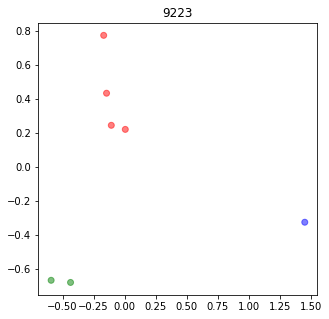

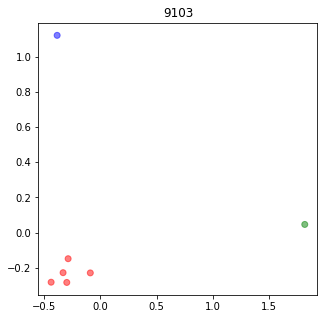

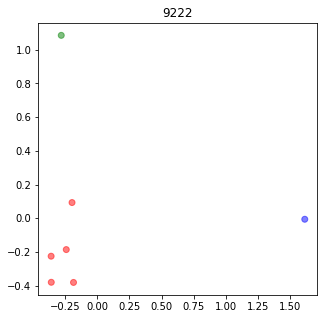

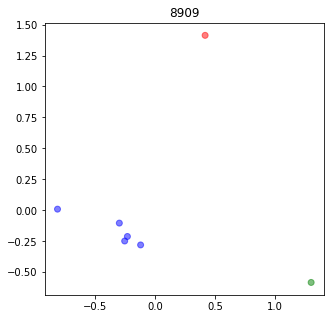

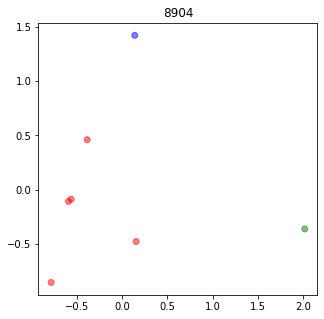

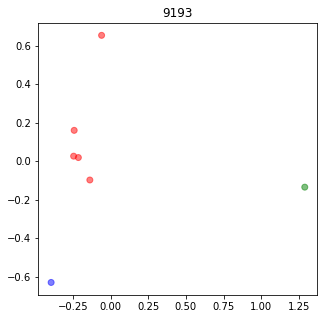

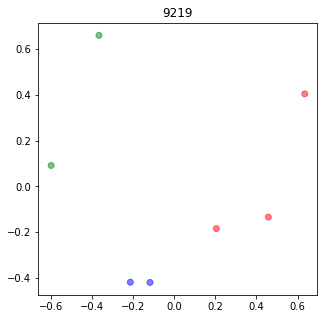

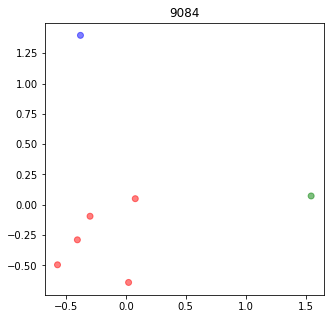

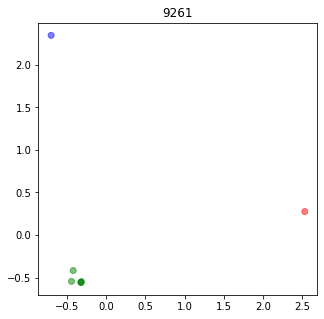

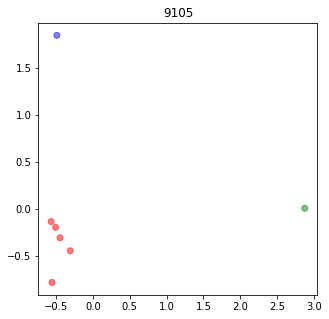

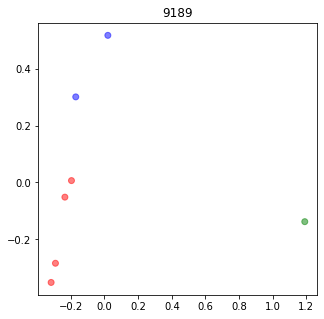

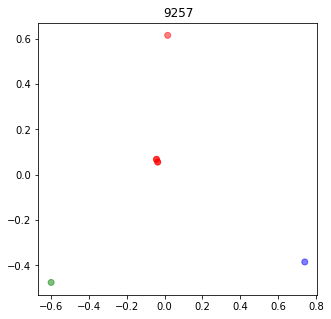

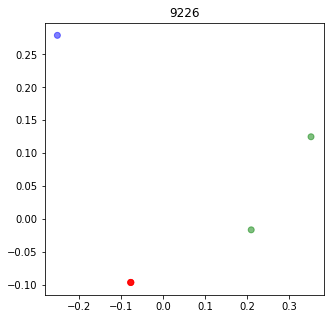

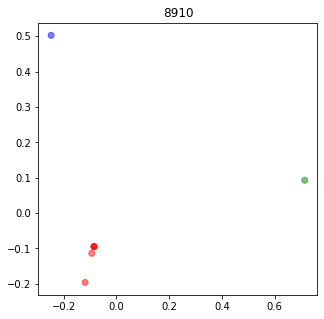

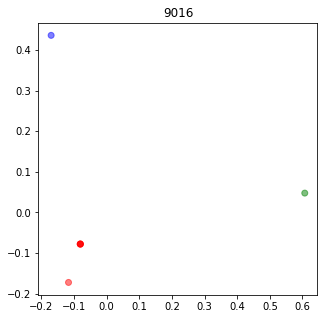

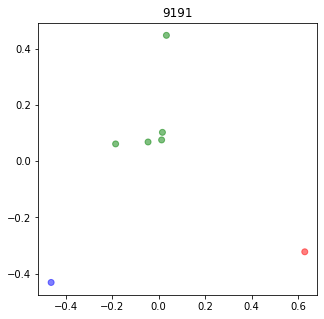

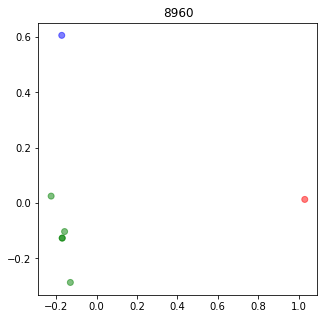

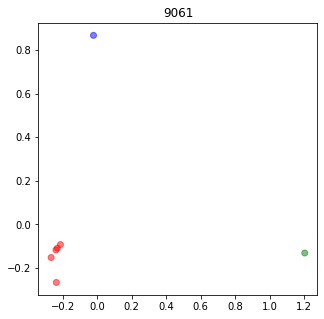

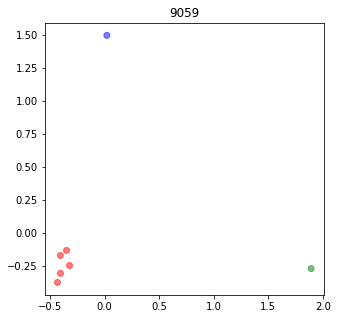

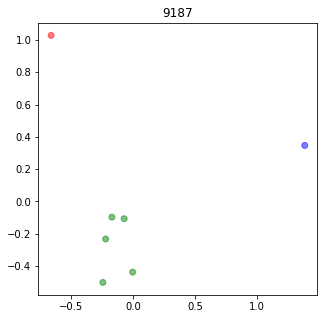

In [8]:
for i in pca_dict.keys():
    
    kmeans = KMeans(n_clusters=3, n_init=5)
    kmeans.fit(pca_dict[i])

    labels = kmeans.predict(pca_dict[i])
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(5, 5))
#     colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
    colmap = {1: 'red', 2: 'green', 3: 'blue'}

    colors = list(map(lambda x: colmap[x+1], labels))
    pca_dict[i]['labels'] = colors

    plt.scatter(pca_dict[i]['x1'], pca_dict[i]['x2'], color=colors, alpha=0.5, edgecolor=colors)
    plt.title(i)

In [9]:
for i in pca_dict.keys():
    print(i)
    display(pca_dict[i])

9223


,x1,x2,labels
0,1.448053,-0.325916,blue
1,-0.146468,0.433867,red
2,-0.169480,0.774684,red
3,-0.436094,-0.680517,green
4,0.004399,0.220856,red
5,-0.592236,-0.667867,green
6,-0.108175,0.244893,red


9103


,x1,x2,labels
0,1.814804,0.046729,green
1,-0.087653,-0.228385,red
2,-0.329265,-0.227096,red
3,-0.296425,-0.282597,red
4,-0.381834,1.120406,blue
5,-0.435196,-0.281269,red
6,-0.284431,-0.147789,red


9222


,x1,x2,labels
0,1.613503,-0.006048,blue
1,-0.183944,-0.381118,red
2,-0.279222,1.085582,green
3,-0.357892,-0.225365,red
4,-0.195455,0.093154,red
5,-0.356762,-0.380186,red
6,-0.240229,-0.186020,red


8909


,x1,x2,labels
0,0.416213,1.412866,red
1,-0.297827,-0.102890,blue
2,-0.812368,0.009720,blue
3,-0.230643,-0.210942,blue
4,1.298629,-0.582040,green
5,-0.253310,-0.247556,blue
6,-0.120694,-0.279158,blue


8904


,x1,x2,labels
0,2.017161,-0.360447,green
1,-0.383282,0.461293,red
2,0.141223,1.421073,blue
3,-0.560611,-0.086327,red
4,-0.781437,-0.852563,red
5,-0.589874,-0.107151,red
6,0.156820,-0.475878,red


9193


,x1,x2,labels
0,-0.059112,0.654234,red
1,-0.244436,0.026596,red
2,-0.393670,-0.629428,blue
3,-0.213128,0.019439,red
4,1.288138,-0.134365,green
5,-0.240813,0.160713,red
6,-0.136980,-0.097188,red


9219


,x1,x2,labels
0,-0.366377,0.659945,green
1,-0.118110,-0.419387,blue
2,-0.213823,-0.418359,blue
3,0.457760,-0.133960,red
4,-0.599181,0.091585,green
5,0.634900,0.404351,red
6,0.204830,-0.184176,red


9084


,x1,x2,labels
0,1.544246,0.072541,green
1,-0.297592,-0.094775,red
2,0.079175,0.050199,red
3,-0.568658,-0.495392,red
4,0.023411,-0.640987,red
5,-0.403156,-0.289289,red
6,-0.377426,1.397705,blue


9261


,x1,x2,labels
0,-0.704182,2.346197,blue
1,-0.422341,-0.417025,green
2,-0.444295,-0.544885,green
3,-0.323797,-0.556966,green
4,2.536455,0.275797,red
5,-0.318043,-0.546152,green
6,-0.323797,-0.556966,green


9105


,x1,x2,labels
0,2.875369,0.008367,green
1,-0.308100,-0.442374,red
2,-0.556252,-0.778433,red
3,-0.567709,-0.132431,red
4,-0.489794,1.843099,blue
5,-0.506737,-0.193453,red
6,-0.446779,-0.304774,red


9189


,x1,x2,labels
0,1.190522,-0.137629,green
1,-0.170747,0.300606,blue
2,0.020088,0.516700,blue
3,-0.196155,0.006654,red
4,-0.235289,-0.051498,red
5,-0.291370,-0.283726,red
6,-0.317049,-0.351106,red


9257


,x1,x2,labels
0,0.016375,0.614366,red
1,-0.036265,0.055578,red
2,-0.036265,0.055578,red
3,-0.042585,0.067485,red
4,0.739788,-0.385021,blue
5,-0.042585,0.067485,red
6,-0.598463,-0.475472,green


9226


,x1,x2,labels
0,-0.251872,0.278998,blue
1,-0.077265,-0.096756,red
2,-0.077265,-0.096756,red
3,-0.077265,-0.096756,red
4,0.351622,0.124778,green
5,0.209310,-0.016751,green
6,-0.077265,-0.096756,red


8910


,x1,x2,labels
0,-0.247290,0.502519,blue
1,-0.084798,-0.095041,red
2,-0.093353,-0.113935,red
3,-0.084798,-0.095041,red
4,0.713623,0.092747,green
5,-0.084798,-0.095041,red
6,-0.118585,-0.196208,red


9016


,x1,x2,labels
0,-0.169578,0.436407,blue
1,-0.080263,-0.077891,red
2,-0.080263,-0.077891,red
3,-0.080263,-0.077891,red
4,0.606966,0.047663,green
5,-0.116335,-0.172506,red
6,-0.080263,-0.077891,red


9191


,x1,x2,labels
0,-0.462214,-0.431008,blue
1,0.013107,0.075207,green
2,0.628876,-0.322128,red
3,-0.184780,0.061107,green
4,0.033688,0.446708,green
5,0.016576,0.102146,green
6,-0.045253,0.067968,green


8960


,x1,x2,labels
0,1.031053,0.012959,red
1,-0.171020,-0.126863,green
2,-0.173290,0.606286,blue
3,-0.225908,0.024956,green
4,-0.130591,-0.287268,green
5,-0.171020,-0.126863,green
6,-0.159225,-0.103206,green


9061


,x1,x2,labels
0,1.204517,-0.131147,green
1,-0.230338,-0.108773,red
2,-0.266312,-0.151729,red
3,-0.238548,-0.117229,red
4,-0.236256,-0.266205,red
5,-0.212351,-0.092374,red
6,-0.020711,0.867458,blue


9059


,x1,x2,labels
0,1.892267,-0.268813,green
1,-0.348940,-0.131293,red
2,-0.431854,-0.373381,red
3,-0.405638,-0.170030,red
4,0.020344,1.493800,blue
5,-0.321561,-0.245723,red
6,-0.404618,-0.304560,red


9187


,x1,x2,labels
0,1.386554,0.346853,blue
1,-0.172984,-0.097166,green
2,-0.073998,-0.106816,green
3,-0.005445,-0.437533,green
4,-0.246197,-0.501471,green
5,-0.223512,-0.232523,green
6,-0.664418,1.028656,red


### Glaucoma

In [10]:
#Read Corpus
path4 = '../../TOP_CON/Glaucoma/Glaucoma(4)/'
path7 = '../../TOP_CON/Glaucoma/Glaucoma(7)/'
path9 = '../../TOP_CON/Glaucoma/Glaucoma(9)/'
path12 = '../../TOP_CON/Glaucoma/Glaucoma(12)/'
#path14 = '../../TOP_CON/Glaucoma/Glaucoma(14)/'
paths = [path4, path7, path9, path12]

dict_images_healthy = defaultdict(list)
def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                #print(new_path[-33:-29])
                df = pd.read_csv(new_path)
                df['fixation_id_new'] = df['fixation_id'] - df.iloc[0,2] + 1
                dict_images_healthy[str(new_path[-33:-29])].append(df)
                
                
                #yield pd.read_csv(new_path)
load_files(paths)

for i in dict_images_healthy.keys(): 
    dict_images_healthy[i] = pd.concat(dict_images_healthy[i])
# dict_images_healthy['9223']



In [11]:
dict_images_arr = defaultdict()
for i in dict_images_healthy.keys(): 
    x = dict_images_healthy[i].norm_pos_x
    y = dict_images_healthy[i].norm_pos_y
    dict_images_arr[i] = bias_boxes(x,y)
    
for i in dict_images_arr.keys(): 
    dict_images_healthy[i]['letters'] = dict_images_arr[i]
    dict_images_healthy[i] = dict_images_healthy[i][['letters', 'fixation_id_new']]
    dict_images_healthy[i]= make_corpus_2(dict_images_healthy[i])

In [12]:
embeddings_dict = defaultdict()
for i in dict_images_healthy.keys(): 
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(dict_images_healthy[i])
    embeddings_dict[i] = sgtembedding_df.set_index('id')
#display(embeddings_dict['9223'].columns)

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

In [13]:
pca_dict = defaultdict()
for i in embeddings_dict.keys(): 
    pca = PCA(n_components=2)
    pca.fit(embeddings_dict[i])
    X=pca.transform(embeddings_dict[i])
    pca_dict[i] = pd.DataFrame(data=X, columns=['x1', 'x2'])


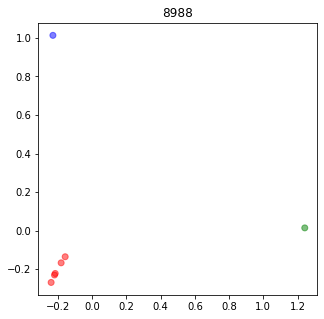

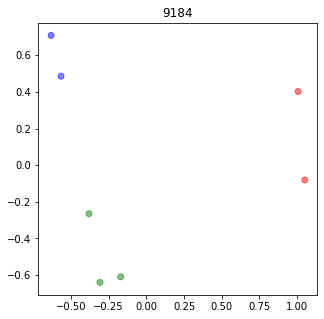

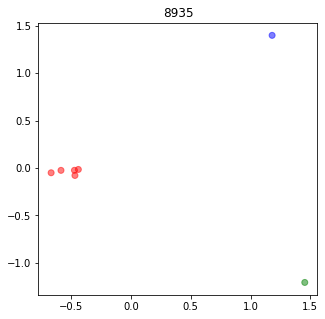

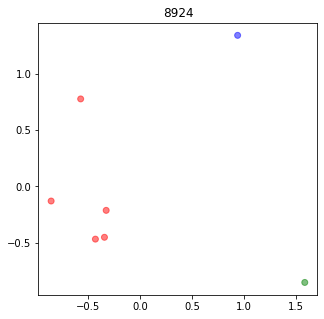

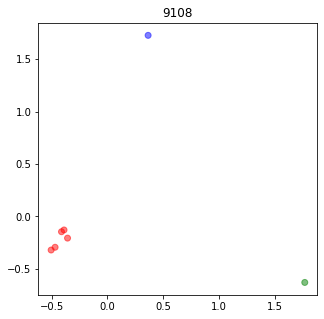

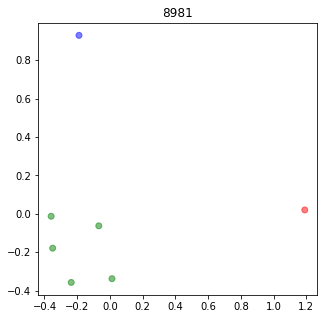

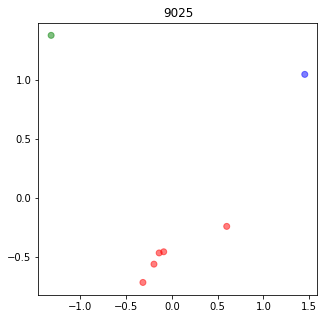

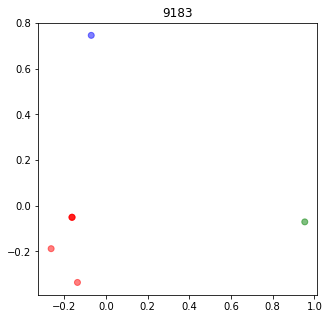

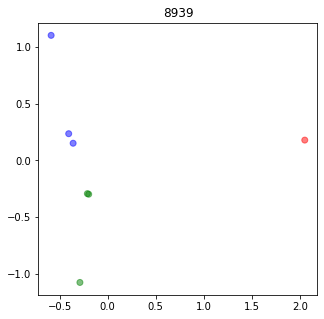

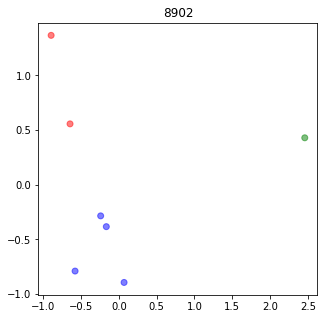

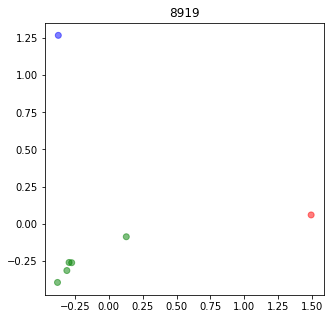

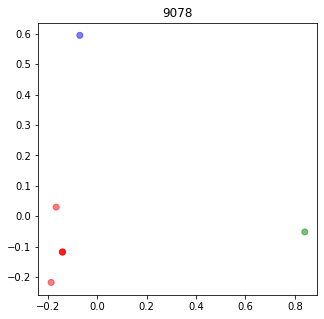

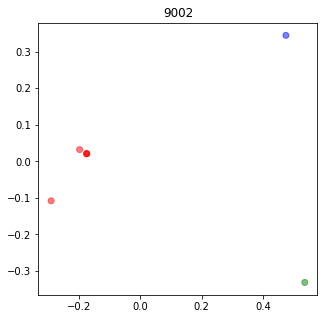

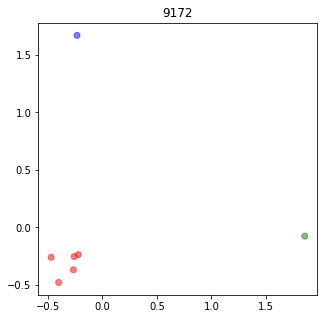

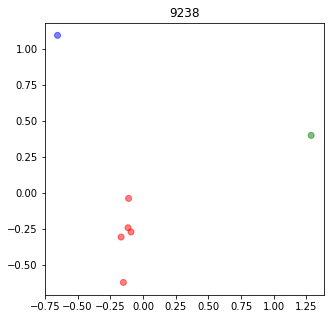

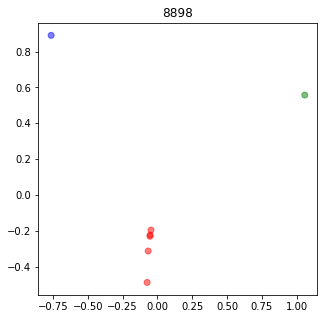

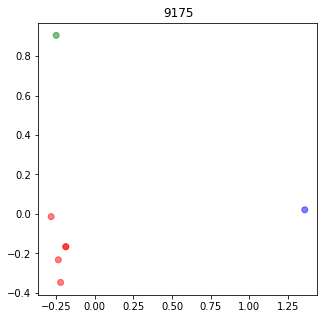

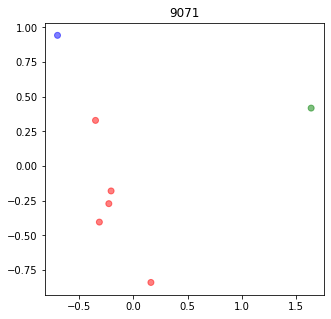

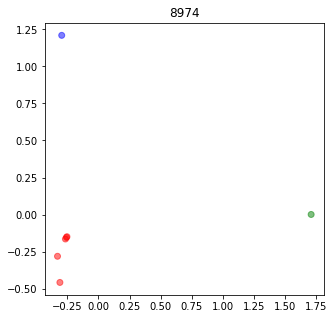

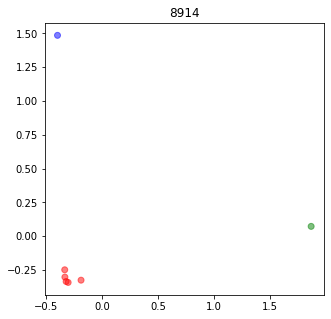

In [14]:
for i in pca_dict.keys():
    
    kmeans = KMeans(n_clusters=3, n_init=5)
    kmeans.fit(pca_dict[i])

    labels = kmeans.predict(pca_dict[i])
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(5, 5))
#     colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
    colmap = {1: 'red', 2: 'green', 3: 'blue'}

    colors = list(map(lambda x: colmap[x+1], labels))
    pca_dict[i]['labels'] = colors

    plt.scatter(pca_dict[i]['x1'], pca_dict[i]['x2'], color=colors, alpha=0.5, edgecolor=colors)
    plt.title(i)

In [15]:
for i in pca_dict.keys():
    print(i)
    display(pca_dict[i])

8988


,x1,x2,labels
0,1.242203,0.013719,green
1,-0.215490,-0.222998,red
2,-0.180983,-0.167751,red
3,-0.157363,-0.136138,red
4,-0.229066,1.013671,blue
5,-0.219846,-0.230900,red
6,-0.239454,-0.269601,red


9184


,x1,x2,labels
0,-0.170746,-0.609891,green
1,1.051176,-0.080852,red
2,1.007331,0.402255,red
3,-0.632034,0.708807,blue
4,-0.381097,-0.265264,green
5,-0.566261,0.485730,blue
6,-0.308368,-0.640785,green


8935


,x1,x2,labels
0,1.453458,-1.206399,green
1,-0.468481,-0.078391,red
2,-0.439995,-0.015033,red
3,-0.585183,-0.024682,red
4,1.180378,1.398607,blue
5,-0.667611,-0.050063,red
6,-0.472565,-0.024040,red


8924


,x1,x2,labels
0,1.589388,-0.852151,green
1,-0.343261,-0.451691,red
2,-0.326605,-0.212853,red
3,-0.857728,-0.130038,red
4,0.941578,1.339228,blue
5,-0.572793,0.775501,red
6,-0.430579,-0.467996,red


9108


,x1,x2,labels
0,1.771008,-0.630150,green
1,-0.469938,-0.294448,red
2,-0.505524,-0.320790,red
3,-0.358258,-0.207151,red
4,0.364978,1.727839,blue
5,-0.412518,-0.146079,red
6,-0.389749,-0.129222,red


8981


,x1,x2,labels
0,1.190306,0.020160,red
1,-0.359277,-0.012764,green
2,0.012521,-0.337958,green
3,-0.236460,-0.357575,green
4,-0.189084,0.929856,blue
5,-0.349949,-0.179029,green
6,-0.068057,-0.062690,green


9025


,x1,x2,labels
0,1.452352,1.047698,blue
1,-0.088072,-0.453275,red
2,-0.137677,-0.463052,red
3,-0.315016,-0.712804,red
4,-1.317298,1.377968,green
5,-0.194348,-0.558051,red
6,0.600060,-0.238484,red


9183


,x1,x2,labels
0,0.953541,-0.070726,green
1,-0.262059,-0.188184,red
2,-0.135870,-0.336222,red
3,-0.161939,-0.050579,red
4,-0.069797,0.746869,blue
5,-0.161939,-0.050579,red
6,-0.161939,-0.050579,red


8939


,x1,x2,labels
0,2.051254,0.178719,red
1,-0.211228,-0.293004,green
2,-0.288852,-1.075691,green
3,-0.359558,0.151079,blue
4,-0.197527,-0.298179,green
5,-0.588427,1.101852,blue
6,-0.405662,0.235225,blue


8902


,x1,x2,labels
0,2.458013,0.429268,green
1,-0.240691,-0.284943,blue
2,-0.165976,-0.383557,blue
3,-0.578979,-0.789855,blue
4,0.068825,-0.894036,blue
5,-0.895592,1.366440,red
6,-0.645600,0.556683,red


8919


,x1,x2,labels
0,1.492066,0.058382,red
1,-0.272638,-0.263634,green
2,-0.377247,-0.396733,green
3,-0.292203,-0.262024,green
4,-0.371360,1.269065,blue
5,-0.308303,-0.316428,green
6,0.129686,-0.088629,green


9078


,x1,x2,labels
0,0.839761,-0.052031,green
1,-0.139712,-0.118118,red
2,-0.139712,-0.118118,red
3,-0.139712,-0.118118,red
4,-0.069602,0.595043,blue
5,-0.185560,-0.218272,red
6,-0.165464,0.029612,red


9002


,x1,x2,labels
0,0.473637,0.344316,blue
1,-0.174032,0.020883,red
2,-0.174032,0.020883,red
3,-0.174032,0.020883,red
4,0.535034,-0.331061,green
5,-0.289611,-0.107942,red
6,-0.196965,0.032038,red


9172


,x1,x2,labels
0,-0.233781,1.670455,blue
1,-0.259549,-0.253216,red
2,-0.471343,-0.259201,red
3,-0.221929,-0.236268,red
4,1.856020,-0.075661,green
5,-0.267213,-0.368103,red
6,-0.402206,-0.478006,red


9238


,x1,x2,labels
0,1.285753,0.397868,green
1,-0.109951,-0.040038,red
2,-0.149788,-0.624353,red
3,-0.167128,-0.308968,red
4,-0.653259,1.092963,blue
5,-0.114136,-0.243949,red
6,-0.091490,-0.273522,red


8898


,x1,x2,labels
0,1.058276,0.557570,green
1,-0.053963,-0.230111,red
2,-0.052384,-0.222782,red
3,-0.046471,-0.195328,red
4,-0.764172,0.890367,blue
5,-0.066814,-0.312284,red
6,-0.074473,-0.487432,red


9175


,x1,x2,labels
0,-0.248913,0.905640,green
1,-0.186627,-0.166349,red
2,-0.281448,-0.013741,red
3,-0.234844,-0.232583,red
4,1.358526,0.020885,blue
5,-0.186627,-0.166349,red
6,-0.220065,-0.347503,red


9071


,x1,x2,labels
0,1.636550,0.418481,green
1,-0.206281,-0.178805,red
2,-0.699825,0.942963,blue
3,-0.314243,-0.403381,red
4,0.160610,-0.838532,red
5,-0.227050,-0.270479,red
6,-0.349761,0.329754,red


8974


,x1,x2,labels
0,1.710628,0.000469,green
1,-0.265518,-0.165357,red
2,-0.329214,-0.281981,red
3,-0.253109,-0.149748,red
4,-0.295412,1.210046,blue
5,-0.257368,-0.154797,red
6,-0.310007,-0.458632,red


8914


,x1,x2,labels
0,1.871951,0.071960,green
1,-0.331499,-0.303204,red
2,-0.320459,-0.335922,red
3,-0.186960,-0.326036,red
4,-0.397580,1.485162,blue
5,-0.302427,-0.342807,red
6,-0.333025,-0.249153,red


## Zeiss - No Bias Boxes

### Healthy

In [26]:
path13 = '../../Zeiss/Healthy/Healthy(3)/'
path5 = '../../Zeiss/Healthy/Healthy(5)/'
path6 = '../../Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)


corpus_healthy = pd.concat(load_files(paths))

In [27]:
x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)
        

In [28]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,"(40, 40)","(40, 41)","(40, 42)","(40, 43)","(40, 44)","(40, 45)","(40, 46)","(40, 47)","(40, 48)","(40, 49)",...,"(1651, 1642)","(1651, 1643)","(1651, 1644)","(1651, 1645)","(1651, 1646)","(1651, 1647)","(1651, 1648)","(1651, 1649)","(1651, 1650)","(1651, 1651)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [29]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


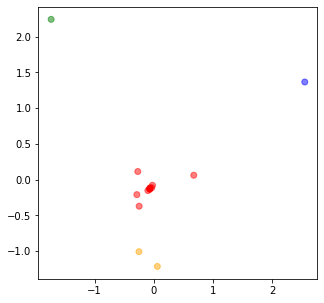

In [30]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [31]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.069503,-0.132272,r
1,-0.100115,-0.153945,r
2,-0.071077,-0.125342,r
3,-0.060739,-0.114259,r
4,-0.022772,-0.079392,r
5,-1.734839,2.242374,g
6,-0.270751,0.112940,r
7,-0.069352,-0.136716,r
8,2.549743,1.365643,b
9,-0.248193,-0.372145,r


### Glaucoma

In [32]:
path13 = '../../Zeiss/Glaucoma/Glaucoma(3)/'
path5 = '../../Zeiss/Glaucoma/Glaucoma(5)/'
path6 = '../../Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]

def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)

corpus_diseased = pd.concat(load_files(paths))

In [33]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)
        

In [34]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,"(17, 17)","(17, 18)","(17, 25)","(17, 51)","(17, 58)","(17, 59)","(17, 60)","(17, 61)","(17, 62)","(17, 63)",...,"(1487, 1478)","(1487, 1479)","(1487, 1480)","(1487, 1481)","(1487, 1482)","(1487, 1483)","(1487, 1484)","(1487, 1485)","(1487, 1486)","(1487, 1487)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


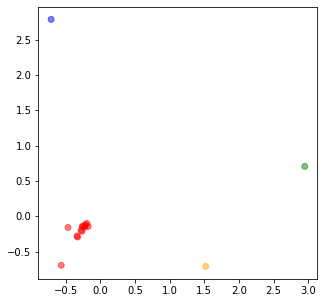

In [36]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [37]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.256293,-0.151591,r
1,-0.255003,-0.140549,r
2,-0.210825,-0.118589,r
3,-0.192773,-0.101657,r
4,-0.464997,-0.159017,r
5,-0.708389,2.786660,b
6,-0.263101,-0.212532,r
7,-0.222054,-0.151226,r
8,-0.562385,-0.693177,r
9,-0.276706,-0.198796,r


## Zeiss - Bias Boxes

### Right Side - Healthy

In [38]:
path13 = '../../Zeiss/Healthy/Healthy(3)/'
path5 = '../../Zeiss/Healthy/Healthy(5)/'
path6 = '../../Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

left = ['8919', '9059', '8960', '9187', '9238', '8914', '8974', '8981', '9025', '9071', '9172', '8904', '8955']
right = ['9189', '8994', '8924', '9175', '8909', '9061', '9084', '9189', 'RNFL']

def load_files_left(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                if filename[-8:-4]  in left: 
                    new_path = i + filename 
                    yield pd.read_csv(new_path)
                    
def load_files_right(path): 
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                if filename[-8:-4]  in right: 
                    new_path = i + filename 
                    yield pd.read_csv(new_path)

corpus_healthy = pd.concat(load_files_right(paths))


In [39]:
def bias_boxes_zeiss_right(x,y):
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.61 > i and 0<j and .275 > j: 
            arr.append('A')
        elif 0.61<i and 1 > i and 0<j and .25 > j: 
            arr.append('B')
        elif 0.61<i and 1 > i and .25<j and .5 > j: 
            arr.append('C')
        elif 0.61<i and 1 > i and 0.5<j and 1 > j: 
            arr.append('D')
        elif 0.23<i and 0.61 > i and 0.7<j and 1 > j: 
            arr.append('E')
        elif 0<i and 0.61 > i and 0.5<j and 0.7 > j: 
            arr.append('F')
        else: 
            arr.append('error')
    return arr

def bias_boxes_zeiss_left(x,y): 
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.4 > i and 0<j and .2 > j: 
            arr.append('A')
        elif 0<i and 0.4 > i and 0.2<j and .5 > j: 
            arr.append('B')
        elif 0.0<i and 0.4 > i and 0.5<j and 1 > j: 
            arr.append('C')
        elif 0.4<i and 0.8 > i and 0<j and 0.25 > j: 
            arr.append('D')
        elif 0.4<i and 1 > i and 0.5<j and 0.71 > j: 
            arr.append('E')
        elif 0.4<i and 0.8 > i and 0.71<j and 1 > j: 
            arr.append('F')
        else: 
            arr.append('error')
    return arr

def make_corpus_3(corpus_new):
    A = np.array(corpus_new.fixation_id[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id[corpus_new.letters=='F'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F]], columns=['id', 'sequence'])
    return corpus

x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = bias_boxes_zeiss_right(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [40]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [41]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


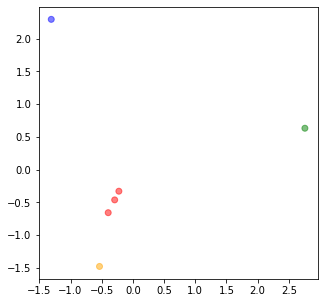

In [42]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [43]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.395911,-0.657733,r
1,-0.224765,-0.329595,r
2,-0.292103,-0.462266,r
3,-0.535247,-1.479135,orange
4,2.756618,0.632512,g
5,-1.308591,2.296217,b


### Right Side - Glaucoma

In [44]:
path13 = '../../Zeiss/Glaucoma/Glaucoma(3)/'
path5 = '../../Zeiss/Glaucoma/Glaucoma(5)/'
path6 = '../../Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]

left = ['8919', '9059', '8960', '9187', '9238', '8914', '8974', '8981', '9025', '9071', '9172', '8904', '8955']
right = ['9189', '8994', '8924', '9175', '8909', '9061', '9084', '9189', 'RNFL']

corpus_diseased = pd.concat(load_files_right(paths))

In [45]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = bias_boxes_zeiss_right(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [46]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [47]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


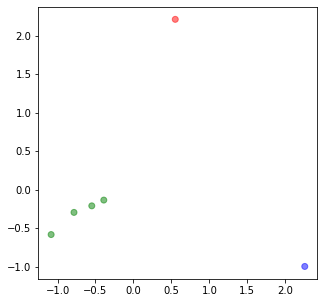

In [48]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [49]:
df['labels'] = colors
df

,x1,x2,labels
0,-1.084413,-0.581284,g
1,-0.390664,-0.133822,g
2,-0.548953,-0.208441,g
3,2.256560,-0.995286,b
4,0.550845,2.212555,r
5,-0.783374,-0.293722,g


### Left Side - Healthy

In [50]:
path13 = '../../Zeiss/Healthy/Healthy(3)/'
path5 = '../../Zeiss/Healthy/Healthy(5)/'
path5 = '../../Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]
corpus_healthy = pd.concat(load_files_left(paths))


In [51]:
x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = bias_boxes_zeiss_left(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [52]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [53]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


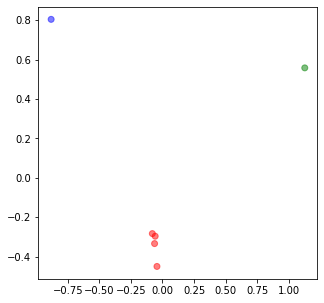

In [54]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [55]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.057929,-0.295887,r
1,-0.882211,0.803689,b
2,1.127137,0.557637,g
3,-0.080461,-0.282716,r
4,-0.062695,-0.333401,r
5,-0.043841,-0.449322,r


### Left Side - Glaucoma

In [56]:
path13 = '../../Zeiss/Glaucoma/Glaucoma(3)/'
path5 = '../../Zeiss/Glaucoma/Glaucoma(5)/'
path6 = '../../Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]
corpus_diseased = pd.concat(load_files_left(paths))

In [57]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = bias_boxes_zeiss_left(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [58]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [59]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


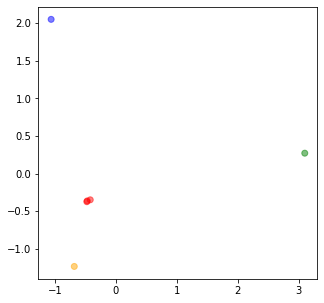

In [60]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [61]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.474633,-0.374271,r
1,-0.680500,-1.235309,orange
2,3.102227,0.271004,g
3,-0.418500,-0.349037,r
4,-0.468053,-0.363337,r
5,-1.060542,2.050950,b
